# DengAI: Prevendo a propagação da doença

**D1INT – Introdução à Ciência de Dados**<br />
Especialização em Ciência de Dados - IFSP Campinas

Grupo 05
- Daniel Vargas Shimamoto
- Diego Machado de Assis

## 0. Motivação

A dengue é uma doença transmitida pelas fêmeas do mosquito Aedes aegypti, que ocorre em partes tropicais e subtropicais do mundo. A cada ano, cerca de 400 milhões de pessoas são infectadas pela dengue, acarretando em cerca de 22 mil mortes por infecções graves. No Brasil, o risco de dengue é classificado como frequente/contínuo. Só em 2020, segundo o ministério da saúde, foram notificados quase 1 milhão de casos prováveis no país. Foram mais de 800 casos graves e mais de 500 óbitos confirmados.

Tendo um mosquito como vetor, a dinâmica de transmissão da dengue está relacionada a variáveis climáticas como *temperatura* e *taxa de precipitação*. As recentes mudanças climáticas que o mundo tem passado podem ter impactos diretos na influência da distribuição global dos vetores dos vírus da dengue. Uma compreensão da relação climática com o potencial da doença pode auxiliar na tomada de decisão das autoridades locais em alocação de recursos e esforços em medidas sanitárias para reduzir os impactos causados pelo vírus. Conseguir realizar predições da dengue de forma mais precisa pode ajudar profissionais de saúde e autoridades sanitárias a antecipar ações e medidas de redução do impacto da epidemia, considerando sua sazonalidade.

## 1. Descrição dos dados

### 1.1. Visão geral

Os dados utilizados e motivação do trabalho são originários de uma [competição](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/) de ciência de dados promovida pelo [DrivenData](https://www.drivendata.org/). O objetivo da competição é de predizer o número total de casos de dengue para dada cidade em determinada semana do ano. Os dados se referem a duas cidades, **San Juan** (Porto Rico) e **Iquitos** (Peru).

O conjunto de dados é composto pelos seguintes arquivos:

| Arquivo | Descrição |
| ------------- | ------------- |
| [Atributos de treinamento][training data features] | Dados das variáveis independentes para treinamento |
| [Rótulos de treinamento][training data labels]     | Variável dependente: número de cados de dengue para cada amostra do *dataset* de treinamento |
| [Atributos de teste][test data features]           | Dados das variáveis independentes para submissão da competição |
| [Formato de saída][submission format]              | Formato de arquivo esperado para os dados de saída do modelo |

[training data features]: https://github.com/ciencia-dados-ifsp-grupo5/dengAI-dados/blob/main/dengue_features_train.csv

[training data labels]: https://github.com/ciencia-dados-ifsp-grupo5/dengAI-dados/blob/main/dengue_labels_train.csv

[test data features]: https://github.com/ciencia-dados-ifsp-grupo5/dengAI-dados/blob/main/dengue_features_test.csv

[submission format]: https://github.com/ciencia-dados-ifsp-grupo5/dengAI-dados/blob/main/submission_format.csv

### 1.1 Informações dos atributos

Cada linha do *dataset* de atributos tem como chave os valores de `(city, year, weekofyear)`. Ou seja, informações referentes a cada uma das cidades consideradas em uma escala de tempo das semanas do ano.

A lista completa de atributos é a seguinte:

#### Indicadores de cidade e data

- `city` - Nome da cidade abreviado: `sj` para San Juan e `iq` para Iquitos
- `year` - Ano
- `weekofyear` - Semana do ano
- `week_start_date` - Data de início da semana do ano, no formato `yyyy-mm-dd`

#### Dados de climáticos da base [NOAA GHCN-Daily](https://www.ncdc.noaa.gov/ghcn-daily-description)

- `station_max_temp_c` – Temperatura máxima ($^{\circ}C$)
- `station_min_temp_c` – Temperatura mínima ($^{\circ}C$)
- `station_avg_temp_c` – Temperatura média ($^{\circ}C$)
- `station_precip_mm` – Precipitação total ($mm$)
- `station_diur_temp_rng_c` – Variação da temperatura diurna ($^{\circ}C$)

#### Dados de precipitação do sistema [PERSIANN](https://chrsdata.eng.uci.edu/)

- `precipitation_amt_mm` – Precipitação total ($mm$)

#### Dados climáticos da base [NOAA NCEP Climate Forecast System Reanalysis](https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/climate-forecast-system-version2-cfsv2#CFS%20Reanalysis%20(CFSR))

- `reanalysis_sat_precip_amt_mm` – Precipitação total ($mm$)
- `reanalysis_dew_point_temp_k` – Temperatura média do ponto de orvalho  ($K$)
- `reanalysis_air_temp_k` – Temperatura média do ar ($K$)
- `reanalysis_relative_humidity_percent` – Umidade relativa média (%)
- `reanalysis_specific_humidity_g_per_kg` – Umidade específica média ($g/kg$)
- `reanalysis_precip_amt_kg_per_m2` – Precipitação total ($kg/m^2$)
- `reanalysis_max_air_temp_k` – Temperatura máxima do ar ($K$)
- `reanalysis_min_air_temp_k` – Temperatura mínima do ar ($K$)
- `reanalysis_avg_temp_k` – Temperatura média do ar ($K$)
- `reanalysis_tdtr_k` – Variação da temperatura diurna ($K$)


#### Dados de [Índice de Vegetação por Diferença Normalizada (NDVI)](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index) do [NOAA CDR](https://www.ncdc.noaa.gov/cdr/terrestrial/normalized-difference-vegetation-index)

- `ndvi_se` – Pixel sudeste do centroide da cidade
- `ndvi_sw` – Pixel sudoeste do centroide da cidade
- `ndvi_ne` – Pixel nordeste do centroide da cidade
- `ndvi_nw` – Pixel noroeste do centroide da cidade

Com excessão dos *Indicadores de cidade e data*, todos os demais atributos são números reais.

### 1.2 Rótulos

Cada rótulo é definido por `(city, year, weekofyear, total_cases)`. O objetivo do modelo será definir o valor *total de casos* de dengue para cada tupla de *cidade*, *ano* e *semana do ano*.

## 2. Importações

### 2.1. Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo dos gráficos
sns.set_theme(style='white', rc={'axes.titlesize': 18, 'axes.labelsize': 14, 'axes.grid.axis': 'y', 'figure.figsize': (22, 6)})

### 2.2. Datasets

In [2]:
DATAPATH = 'https://github.com/ciencia-dados-ifsp-grupo5/dengAI-dados/blob/main'

features_path = f'{DATAPATH}/dengue_features_train.csv?raw=true'
labels_path   = f'{DATAPATH}/dengue_labels_train.csv?raw=true'

features = pd.read_csv(features_path)
labels = pd.read_csv(labels_path)

In [3]:
features.head(3)

city  year  weekofyear week_start_date  ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.12260  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.16990  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.03225  0.172967  0.157200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.211429  ...   
2  0.170843                 34.54             298.781429  ...   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                29.4                20.0               16.0  
1                31.7                22.2                8.6  
2                32.2                22.8               41.4  

[3 rows x 24 columns]

In [4]:
labels.head(3)

city  year  weekofyear  total_cases
0   sj  1990          18            4
1   sj  1990          19            5
2   sj  1990          20            4

## 3. Pré-processamento

In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [6]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         1456 non-null   object
 1   year         1456 non-null   int64 
 2   weekofyear   1456 non-null   int64 
 3   total_cases  1456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


### 3.1. Tipos de dados

O único atributo que não possui o tipo de dado correto é `week_start_date`, que deveria ser uma data. Vamos convertê-lo

In [7]:
features.loc[:, 'week_start_date'] = pd.to_datetime(features.week_start_date)

In [8]:
features.dtypes

city                                             object
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

### 3.2. Definição dos índices

Vamos definir a chave única de cada registro do *dataset*, ou seja, a tupla `(city, year, weekofyear)`, como índices dos DataFrames

In [9]:
# DataFrame de features
features.set_index(['city', 'year', 'weekofyear'], inplace=True)

# DataFrame de labels
labels.set_index(['city', 'year', 'weekofyear'], inplace=True)

### 3.3. Unidades de medida

Por possuir dados do mesmo fenônemo de fontes diferentes, precisamos padronizar as unidades de medida de alguns deles, para evitar discrepâncias.

#### 3.3.1. Precipitação

Os atributos de precipitação são expressos no *dataset* em duas unidades de medida: milímetros ($mm$) e Quilograma por metro quadrado ($kg/m^2$).

A relação entre elas é a seguinte (considerando que para a água, $1kg = 1 L$):

$$
1\frac{kg}{m^2} = 1\frac{L}{m^2} = 1\frac{dm^3}{m^2} = 1\frac{(10^{-1}m)^3}{m^2} = 1\frac{10^{-3}m^3}{m^2} = 10^{-3}m = 1mm
$$

Portanto, as duas unidades de medida expressam o mesmo valor, e nenhuma conversão precisa ser feita.

#### 3.3.2. Temperatura

Os atributos de temperatura estão expressos em grau Celsius ($^{\circ}C$) e Kelvin ($K$). A conversão dos valores é dada pela [equação](https://www.metric-conversions.org/pt-br/temperatura/celsius-em-kelvin.htm):

$$
K = \mathrm{^{\circ}}C + 273\mathrm{,}15
$$

Vamos padronizar as temperaturas em $K$. Precisamos converter os dados do NOAA GHCN-Daily:

- `station_max_temp_c`
- `station_min_temp_c`
- `station_avg_temp_c`

O atributo `station_diur_temp_rng_c`, apesar de ser uma temperatura dita em $^{\circ}C$, representa de fato uma variação de temperatura. Como valores em $K$ tem a mesma proporção dos $^{\circ}C$, as variações são equivalentes. Portanto, não precisa ser convertido.


In [10]:
features[['station_avg_temp_k', 'station_max_temp_k', 'station_min_temp_k']] = features[['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c']] + 273.15
features.drop(columns=['station_max_temp_c', 'station_min_temp_c', 'station_avg_temp_c'], inplace=True)

### 3.4. Divisão dos dados para cada cidade

Como o objetivo final será analisar o padrão de disseminação da dengue e, provavelmente, cada uma das cidades tem suas particularidades, vamos tratar os dados de forma separada para cada uma. Para isso, a primeira coisa a se fazer é separar os *DataFrames* em dois conjuntos.

In [11]:
# DataFrames com registros de San Juan
sj_features = features.loc['sj']
sj_labels = labels.loc['sj']

# DataFrames com registros Iquitos
iq_features = features.loc['iq']
iq_labels = labels.loc['iq']

In [12]:
print('SAN JUAN')
print('Atributos:', sj_features.shape)
print('Rótulos  :', sj_labels.shape)
print()
print('IQUITOS')
print('Atributos:', iq_features.shape)
print('Rótulos  :', iq_labels.shape)

SAN JUAN
Atributos: (936, 21)
Rótulos  : (936, 1)

IQUITOS
Atributos: (520, 21)
Rótulos  : (520, 1)


### 3.5. Valores nulos

In [13]:
sj_features.isna().sum()

week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_diur_temp_rng_c                    6
station_precip_mm                          6
station_avg_temp_k                         6
station_max_temp_k                         6
station_min_temp_k                         6
dtype: int64

In [14]:
iq_features.isna().sum()

week_start_date                           0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_diur_temp_rng_c                  37
station_precip_mm                        16
station_avg_temp_k                       37
station_max_temp_k                       14
station_min_temp_k                        8
dtype: int64

Temos valores faltantes em todas as colunas dos DataFrames. Como estamos trabalhando com séries temporais, não podemos simplesmente excluir esses registros.

No caso de San Juan, os dados faltantes são principalmente relacionados ao *Índice de Vegetação*, em especial da região nordeste ao centroide da cidade. Para Iquitos, a maior parte dos valores nulos se refere aos dados de temperatura da da base *NOAA GHCN-Daily*.

Vamos simular como ficaria o preenchimento destes usando uma [interpolação linear](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html) dos valores

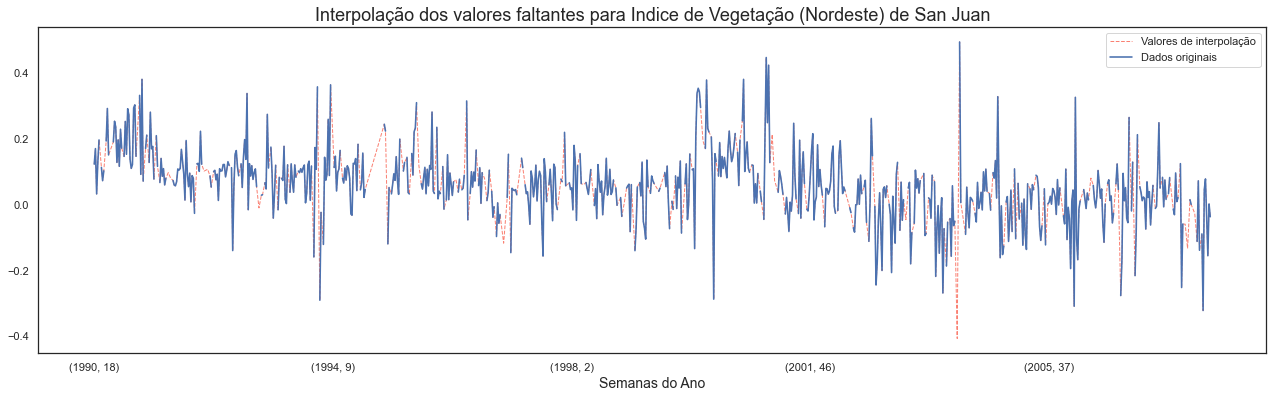

In [15]:
plt.figure(figsize=(22,6))
sj_features.interpolate().ndvi_ne.plot.line(lw=1, color='salmon', label='Valores de interpolação', linestyle = '--')
sj_features.ndvi_ne.plot.line(lw=1.6, label='Dados originais')

plt.title('Interpolação dos valores faltantes para Indice de Vegetação (Nordeste) de San Juan')
plt.xlabel('Semanas do Ano')
plt.legend()
plt.show()

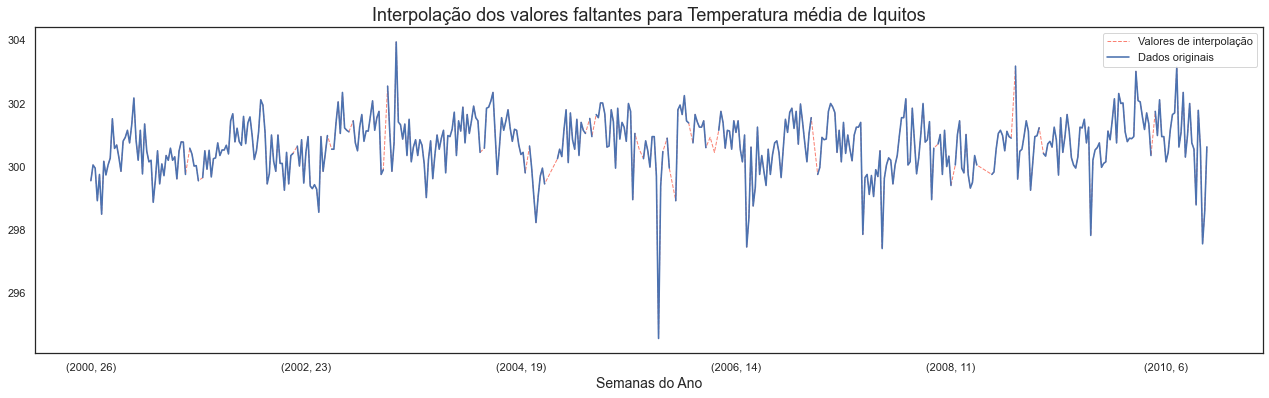

In [16]:
plt.figure(figsize=(22,6))
iq_features.interpolate().station_avg_temp_k.plot.line(lw=1, color='salmon', label='Valores de interpolação', linestyle = '--')
iq_features.station_avg_temp_k.plot.line(lw=1.6, label='Dados originais')

plt.title('Interpolação dos valores faltantes para Temperatura média de Iquitos')
plt.xlabel('Semanas do Ano')
plt.legend()
plt.show()

Tendo estes gráficos como amostragem, nos parece bem razoável utilizar este método para preenchimento dos valores nulos.

In [17]:
# Preenchendo os valores faltantes dos datasets a partir de uma iterpolação linear dos valores adjacentes
sj_features = sj_features.interpolate(axis=0)
iq_features = iq_features.interpolate(axis=0)

In [18]:
# Confirmando que todos os dados faltantes foram preenchidos
(sj_features.isna() & iq_features.isna()).any()

week_start_date                          False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_diur_temp_rng_c                  False
station_precip_mm                        False
station_avg_temp_k                       False
station_max_temp_k                       False
station_min_temp_k                       False
dtype: bool

## 4. Análise Exploratória

A variável alvo `total_cases` é um número inteiro não negativo, o que significa que estamos procurando fazer um modelo de  **previsão de contagem**. As técnicas mais utilizadas para esse tipo de modelo são

1. Regressão de Poisson
2. Regressão Binomial Negativa

Para escolher qual tipo de Regressão utilizar, algumas estatísticas descritivas são necessárias, vamos explorá-las agora.

### 4.1. Análise dos atributos

#### 4.1.1 Precipitação

Existem 4 colunas com dados de precipitação total:
1. `station_precip_mm`
1. `precipitation_amt_mm`
1. `reanalysis_sat_precip_amt_mm`
1. `reanalysis_precip_amt_kg_per_m2`

Vamos analisar como é a distribuição dos valores

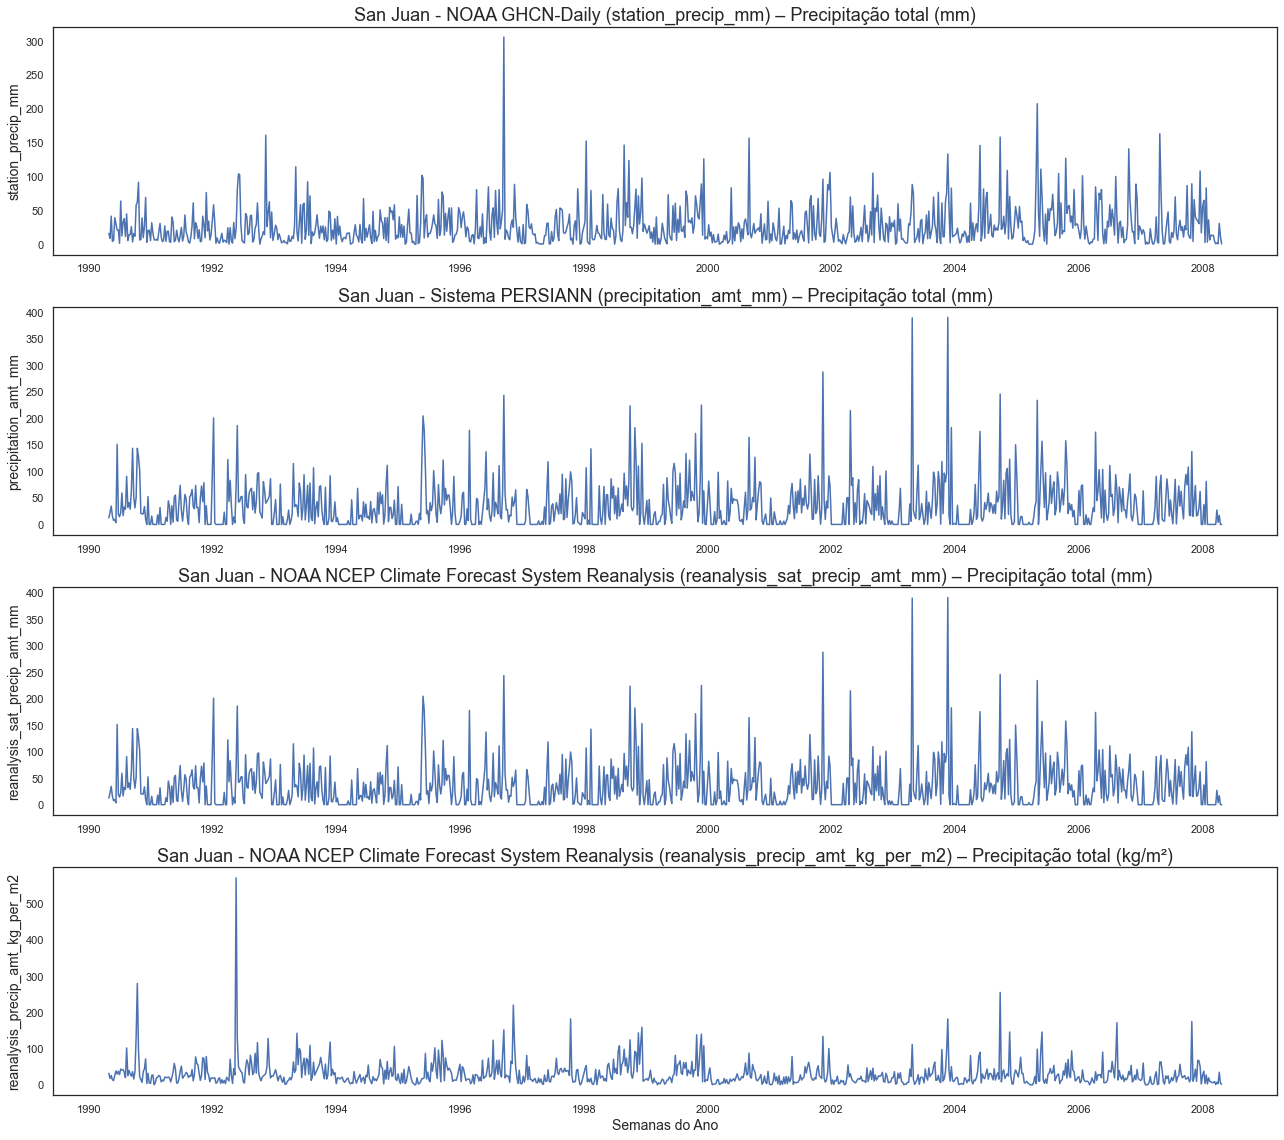

In [19]:
fig, axs = plt.subplots(4, figsize=(18,16))

sns.lineplot(data = sj_features, y = 'station_precip_mm', x = 'week_start_date', ax = axs[0])
axs[0].set_title('San Juan - NOAA GHCN-Daily (station_precip_mm) – Precipitação total (mm)' )
axs[0].set_xlabel('')

sns.lineplot(data = sj_features, y = 'precipitation_amt_mm', x = 'week_start_date',  ax=axs[1])
axs[1].set_title('San Juan - Sistema PERSIANN (precipitation_amt_mm) – Precipitação total (mm)')
axs[1].set_xlabel('')

sns.lineplot(data = sj_features, y = 'reanalysis_sat_precip_amt_mm', x = 'week_start_date',  ax=axs[2])
axs[2].set_title('San Juan - NOAA NCEP Climate Forecast System Reanalysis (reanalysis_sat_precip_amt_mm) – Precipitação total (mm)')
axs[2].set_xlabel('')

sns.lineplot(data = sj_features, y = 'reanalysis_precip_amt_kg_per_m2', x = 'week_start_date',  ax=axs[3])
axs[3].set_title('San Juan - NOAA NCEP Climate Forecast System Reanalysis (reanalysis_precip_amt_kg_per_m2) – Precipitação total (kg/m²)')
axs[3].set_xlabel('Semanas do Ano')

plt.tight_layout()
plt.show()

Observando os gráficos, nos parece que as colunas `precipitation_amt_mm` e `reanalysis_sat_precip_amt_mm` possuem os mesmos valores. Vamos verificar as diferenças entre elas

In [20]:
diferenca_colunas = sj_features.precipitation_amt_mm - sj_features.reanalysis_sat_precip_amt_mm
print(f'A diferença máxima entre precipitaion_amt_mm e reanalysis_sat_precip_amt_mm é de {diferenca_colunas.max()}')

A diferença máxima entre precipitaion_amt_mm e reanalysis_sat_precip_amt_mm é de 0.0


Pelas análise da diferença máxima, podemos afirmar que:

`precipitaion_amt_mm` = `reanalysis_sat_precip_amt_mm`

Vamos verificar se o mesmo fenômeno acontece para os dados de **Iquitos**

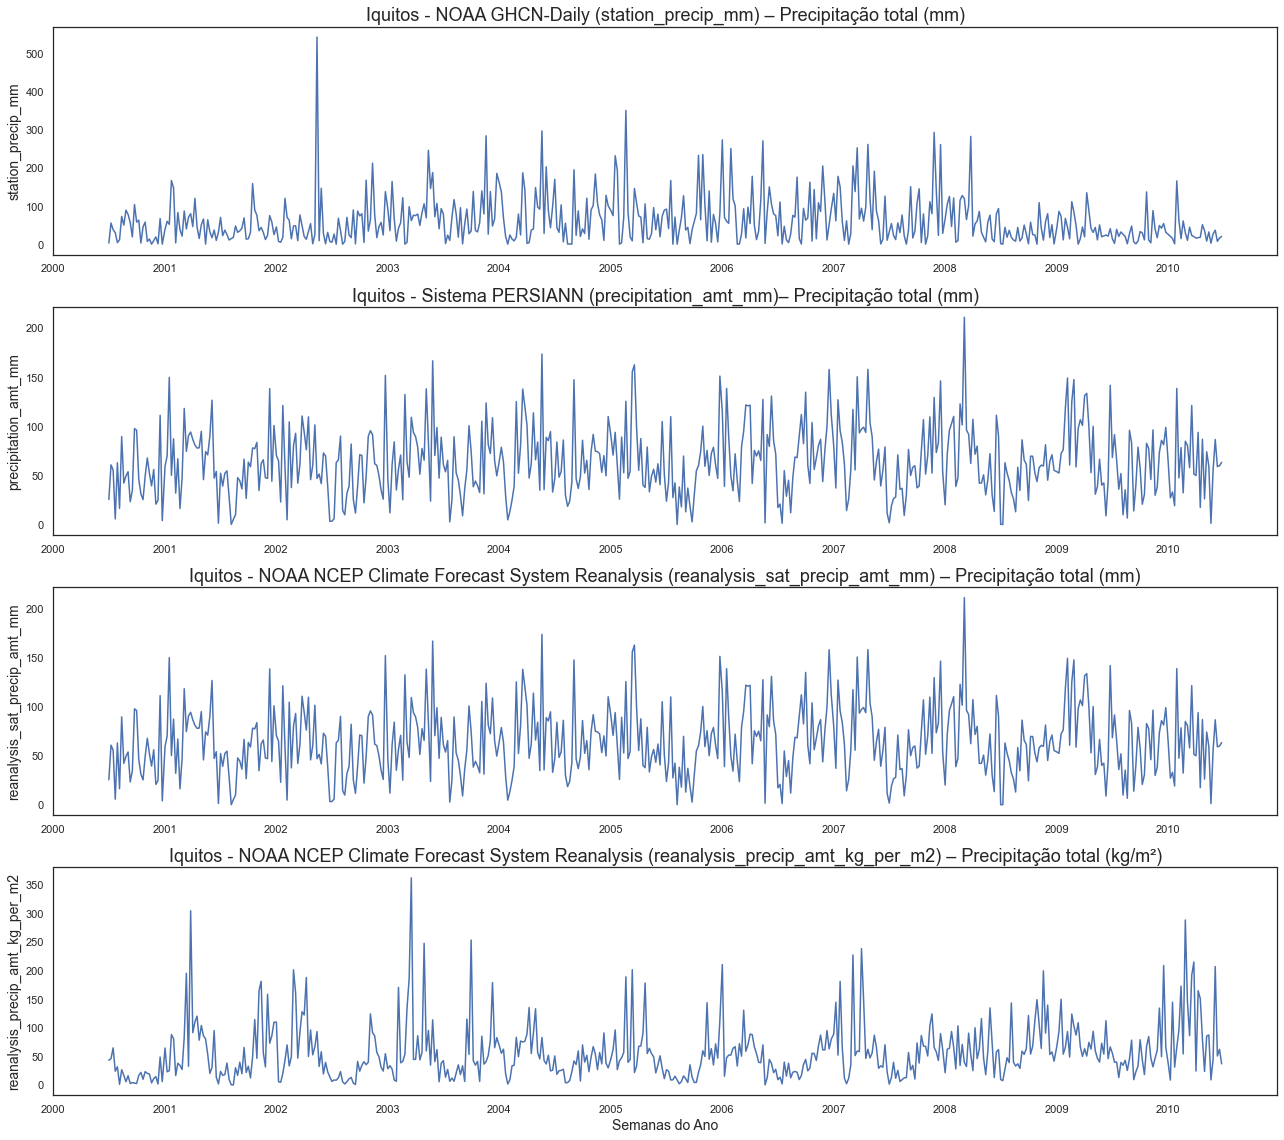

A diferença máxima entre precipitaion_amt_mm e reanalysis_sat_precip_amt_mm é de 0.0


In [21]:
fig, axs = plt.subplots(4, figsize=(18,16))

sns.lineplot(data = iq_features, y = 'station_precip_mm', x = 'week_start_date', ax = axs[0])
axs[0].set_title('Iquitos - NOAA GHCN-Daily (station_precip_mm) – Precipitação total (mm)' )
axs[0].set_xlabel('')

sns.lineplot(data = iq_features, y = 'precipitation_amt_mm', x = 'week_start_date',  ax=axs[1])
axs[1].set_title('Iquitos - Sistema PERSIANN (precipitation_amt_mm)– Precipitação total (mm)')
axs[1].set_xlabel('')

sns.lineplot(data = iq_features, y = 'reanalysis_sat_precip_amt_mm', x = 'week_start_date',  ax=axs[2])
axs[2].set_title('Iquitos - NOAA NCEP Climate Forecast System Reanalysis (reanalysis_sat_precip_amt_mm) – Precipitação total (mm)')
axs[2].set_xlabel('')

sns.lineplot(data = iq_features, y = 'reanalysis_precip_amt_kg_per_m2', x = 'week_start_date',  ax=axs[3])
axs[3].set_title('Iquitos - NOAA NCEP Climate Forecast System Reanalysis (reanalysis_precip_amt_kg_per_m2) – Precipitação total (kg/m²)')
axs[3].set_xlabel('Semanas do Ano')

plt.tight_layout()
plt.show()

diferenca_colunas = iq_features.precipitation_amt_mm - iq_features.reanalysis_sat_precip_amt_mm
print(f'A diferença máxima entre precipitaion_amt_mm e reanalysis_sat_precip_amt_mm é de {diferenca_colunas.max()}')

Como as colunas `precipitaion_amt_mm` e `reanalysis_sat_precip_amt_mm` são idênticas nas duas cidades, optamos por excluir a coluna `precipitation_amt_mm ` de dos *DataFrame* de atributos

In [22]:
iq_features.drop(columns = 'precipitation_amt_mm', inplace = True)
sj_features.drop(columns = 'precipitation_amt_mm', inplace = True)

print('SAN JUAN')
print('Atributos: ', sj_features.shape)
print()
print('IQUITOS')
print('Atributos: ', iq_features.shape)

SAN JUAN
Atributos:  (936, 20)

IQUITOS
Atributos:  (520, 20)


#### 4.1.2. Umidade

##### 4.1.2.1. Umidade Relativa

A umidade relativa do ar é a relação entre a quantidade de água existente no ar (umidade absoluta) e a quantidade máxima que poderia haver na mesma temperatura (ponto de saturação). Ela é um dos indicadores usados na meteorologia para se saber como o tempo se comportará [fazer previsões](https://www.infoescola.com/meteorologia/umidade-relativa-do-ar/).

A informação referente a umidade relativa encontra-se na coluna `reanalysis_relative_humidity_percent`.

Vamos entender como é a distribuição da umidade relativa em ambas as cidades

In [23]:
pd.DataFrame({
    'SJ' : sj_features['reanalysis_relative_humidity_percent'],
    'IQ' : iq_features['reanalysis_relative_humidity_percent']
}).describe().round(2)

SJ      IQ
count  936.00  520.00
mean    78.57   88.66
std      3.38    7.56
min     66.74   57.79
25%     76.25   84.39
50%     78.67   90.92
75%     80.95   94.56
max     87.58   98.61

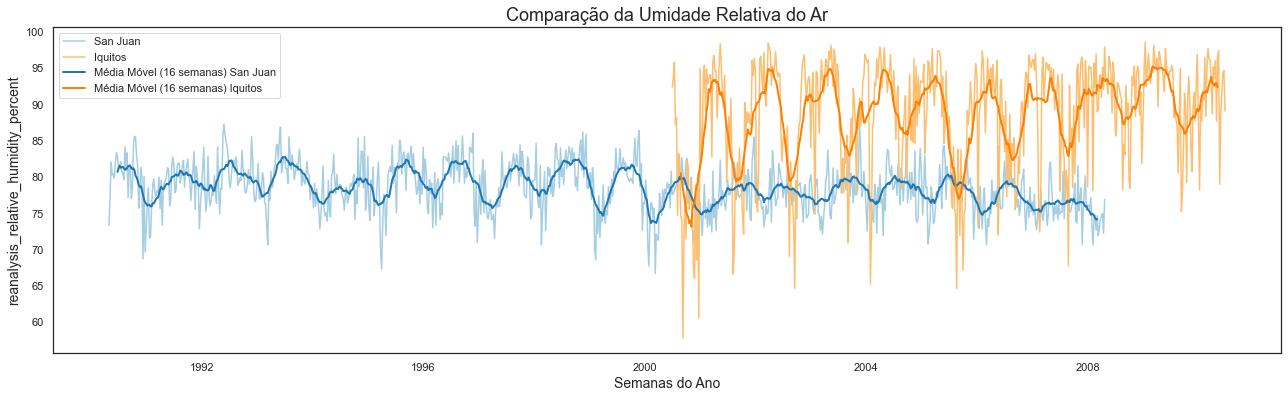

In [24]:
# Média móvel de 16 semanas
sj_mm_humidity = sj_features[['week_start_date', 'reanalysis_relative_humidity_percent']].rolling(16, on='week_start_date', center=True).mean()
iq_mm_humidity = iq_features[['week_start_date', 'reanalysis_relative_humidity_percent']].rolling(16, on='week_start_date', center=True).mean()

plt.figure(figsize=(22,6))
cmap = sns.color_palette("Paired")

sns.lineplot(data = sj_features, y='reanalysis_relative_humidity_percent', x='week_start_date', color=cmap[0], label='San Juan')
sns.lineplot(data = iq_features, y='reanalysis_relative_humidity_percent', x='week_start_date', color=cmap[6], label='Iquitos')

sns.lineplot(data = sj_mm_humidity, y='reanalysis_relative_humidity_percent', x='week_start_date', color=cmap[1], lw=2, label = 'Média Móvel (16 semanas) San Juan')
sns.lineplot(data = iq_mm_humidity, y='reanalysis_relative_humidity_percent', x='week_start_date', color=cmap[7], lw=2, label = 'Média Móvel (16 semanas) Iquitos')

plt.title('Comparação da Umidade Relativa do Ar')
plt.xlabel('Semanas do Ano')
plt.legend()
plt.show()

Pela tabela e o gráfico apresentado, é possível ver que em **Iquitos**, os valores médios de umidade relativa e sua variação são muito superiores à **San Juan**. Pelo gráfico também é possível perceber a **sazonalidade** anual da variação de umidade. Porém, note como essa sazonalidade é muito mais marcada em Iquitos do que em San Juan. Estes fatores podem indicar que a influência da umidade possar ser bastante relevante para entendermos o cenário de Iquitos.

##### 4.1.2.2. Umidade Específica

A Umidade específica é a razão de vapor de água com o ar (incluindo o próprio vapor de água e o ar seco) em uma massa particular. A razão de humidade específica é expressa como uma razão de gramas (g) de vapor de água por quilograma (kg) da massa de [ar úmido total](https://pt.wikipedia.org/wiki/Humidade#Humidade_espec%C3%ADfica).

A informação referente de umidade específica no *dataset* advém da base *NCEP CFSR* e encontra-se na coluna `reanalysis_specific_humidity_g_per_kg`.

In [25]:
pd.DataFrame({
    'SJ' : sj_features['reanalysis_specific_humidity_g_per_kg'],
    'IQ' : iq_features['reanalysis_specific_humidity_g_per_kg']
}).describe().round(2)

SJ      IQ
count  936.00  520.00
mean    16.55   17.10
std      1.56    1.44
min     11.72   12.11
25%     15.23   16.12
50%     16.83   17.44
75%     17.85   18.18
max     19.44   20.46

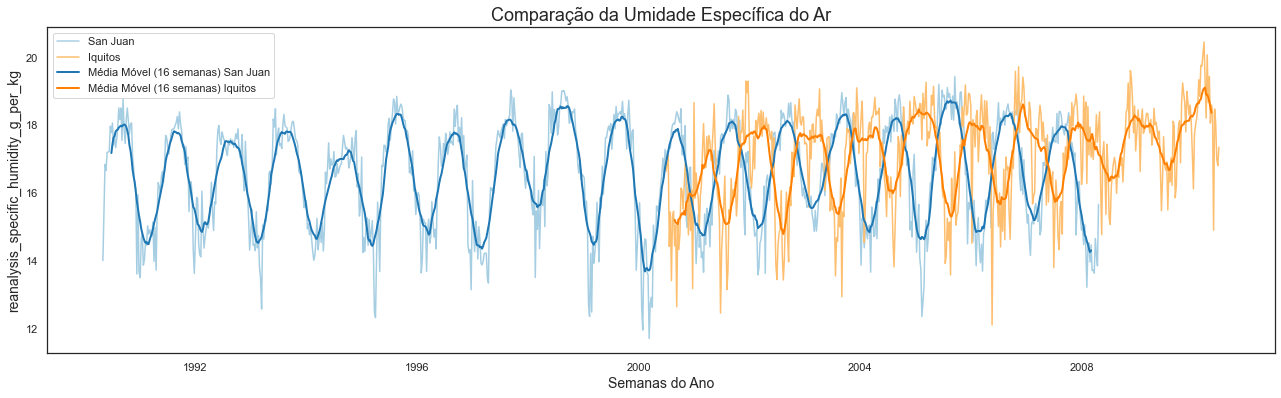

In [26]:
# Média móvel de 16 semanas
sj_mm_humidity = sj_features[['week_start_date', 'reanalysis_specific_humidity_g_per_kg']].rolling(16, on='week_start_date', center=True).mean()
iq_mm_humidity = iq_features[['week_start_date', 'reanalysis_specific_humidity_g_per_kg']].rolling(16, on='week_start_date', center=True).mean()

plt.figure(figsize=(22,6))
cmap = sns.color_palette("Paired")

sns.lineplot(data = sj_features, y='reanalysis_specific_humidity_g_per_kg', x='week_start_date', color=cmap[0], label='San Juan')
sns.lineplot(data = iq_features, y='reanalysis_specific_humidity_g_per_kg', x= 'week_start_date', color=cmap[6], label='Iquitos')

sns.lineplot(data = sj_mm_humidity, y='reanalysis_specific_humidity_g_per_kg', x='week_start_date', color=cmap[1], lw=2, label='Média Móvel (16 semanas) San Juan')
sns.lineplot(data = iq_mm_humidity, y='reanalysis_specific_humidity_g_per_kg', x='week_start_date', color=cmap[7], lw=2, label='Média Móvel (16 semanas) Iquitos')

plt.title('Comparação da Umidade Específica do Ar')
plt.xlabel('Semanas do Ano')
plt.legend()
plt.show()

No caso da umidade específica, o comportamento da curva para San Juan é diferente do que vimos anteriormente. A sazonalidade é *mais marcada* e a amplitude de valores passa a ser similar à amplitude de Iquitos.

Interessante notar que as curvas para San Juan e Iquitos estão aproximadamente *meio período deslocadas* uma da outra. Ou seja, de forma geral, o intervalo de crescimento de cada curva coincide com o intervalo de decrescimento da outra, e vice-versa.

##### 4.1.2.3. Correlação entre as medidas de umidade

Vamos observar qual a correlação entre as duas diferentes medidas de umidade para cada uma das cidades

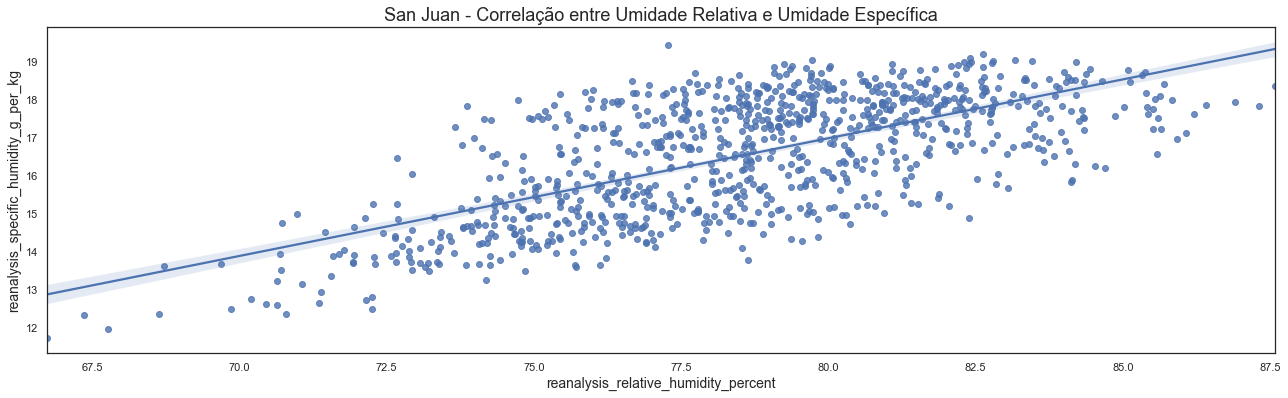

In [27]:
plt.figure(figsize=(22,6))
sns.regplot(data=sj_features, x='reanalysis_relative_humidity_percent', y='reanalysis_specific_humidity_g_per_kg')

plt.title('San Juan - Correlação entre Umidade Relativa e Umidade Específica')
plt.show()

In [28]:
sj_features[['reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg']].corr()

reanalysis_relative_humidity_percent  \
reanalysis_relative_humidity_percent                                1.00000   
reanalysis_specific_humidity_g_per_kg                               0.67301   

                                       reanalysis_specific_humidity_g_per_kg  
reanalysis_relative_humidity_percent                                 0.67301  
reanalysis_specific_humidity_g_per_kg                                1.00000

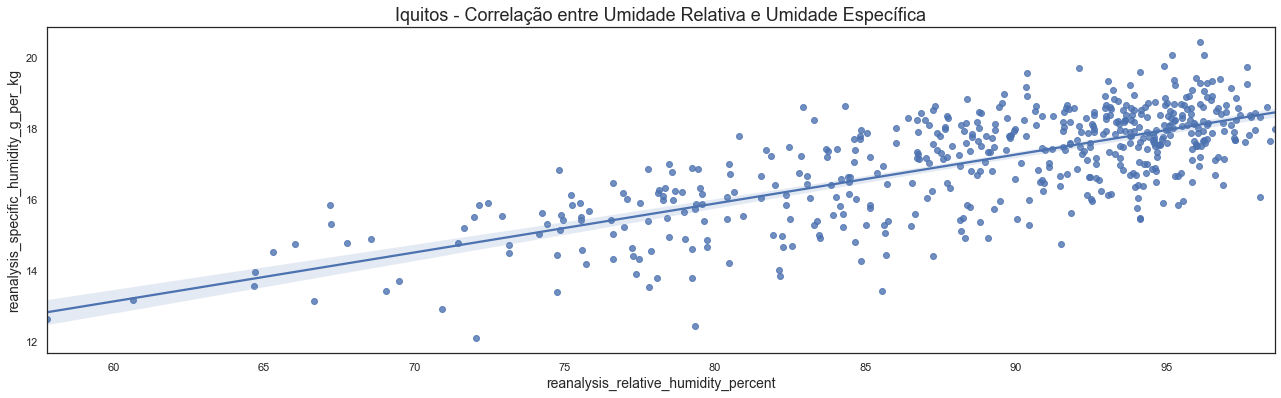

In [29]:
plt.figure(figsize=(22,6))
sns.regplot(data=iq_features, x='reanalysis_relative_humidity_percent', y='reanalysis_specific_humidity_g_per_kg')

plt.title('Iquitos - Correlação entre Umidade Relativa e Umidade Específica')
plt.show()

In [30]:
iq_features[['reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg']].corr()

reanalysis_relative_humidity_percent  \
reanalysis_relative_humidity_percent                               1.000000   
reanalysis_specific_humidity_g_per_kg                              0.722881   

                                       reanalysis_specific_humidity_g_per_kg  
reanalysis_relative_humidity_percent                                0.722881  
reanalysis_specific_humidity_g_per_kg                               1.000000

Os gráficos e valores acima confimam nossa expectativa de que a correlação entre as medidas de umidade seriam maiores em Iquitos (0,72) do que em San Juan (0,67). Isto porque no ítem e 4.4.2.1 vimos como o gráfico de umidade relativa para San Juan tinha períodos menos definidos que o apresentado no gráfico seguinte, de umidade específica.

Porém, em ambos os casos podemos ver que existe uma correlação de moderada a forte, sendo significativa para a modelagem que faremos futuramente.

#### 4.1.3. Temperatura

##### 4.1.3.1 Variação da Temperatura Diurna

Existem 2 atributos que expressão a varição de temperatura durante o dia:

1. `station_diur_temp_rng_c` –  Variação da temperatura diurna ($^oC$)
1. `reanalysis_tdtr_k ` – Variação da temperatura diurna ($K$)

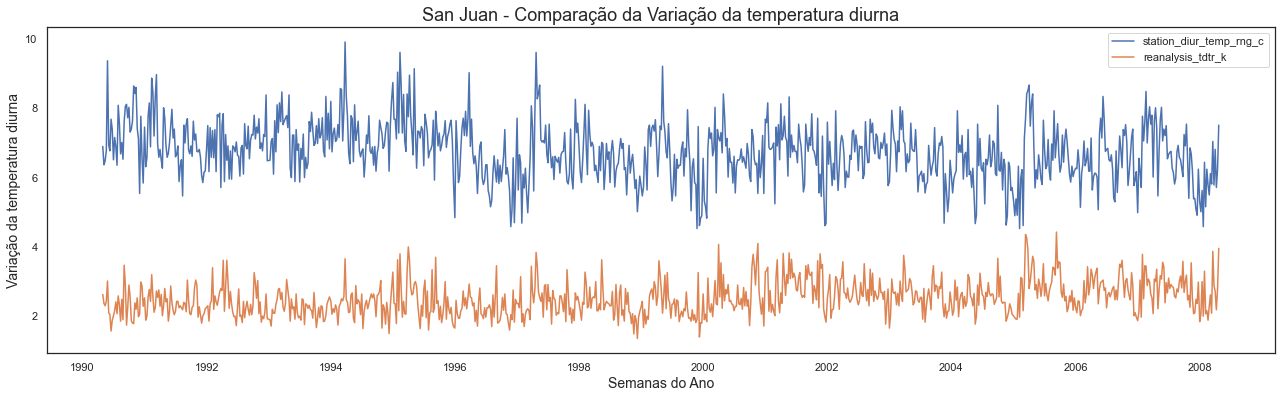

In [31]:
# Gráfico de linha
plt.figure(figsize=(22,6))
sns.lineplot(data = sj_features, y = 'station_diur_temp_rng_c', x = 'week_start_date', label = 'station_diur_temp_rng_c')
sns.lineplot(data = sj_features, y = 'reanalysis_tdtr_k', x = 'week_start_date', label = 'reanalysis_tdtr_k')

plt.title('San Juan - Comparação da Variação da temperatura diurna')
plt.xlabel('Semanas do Ano')
plt.ylabel('Variação da temperatura diurna')
plt.legend()
plt.show()

A análise dos valores em **San Juan** mostra que a distribuição da Variação da Temperatura Diurna é **diferente** entre as medições.

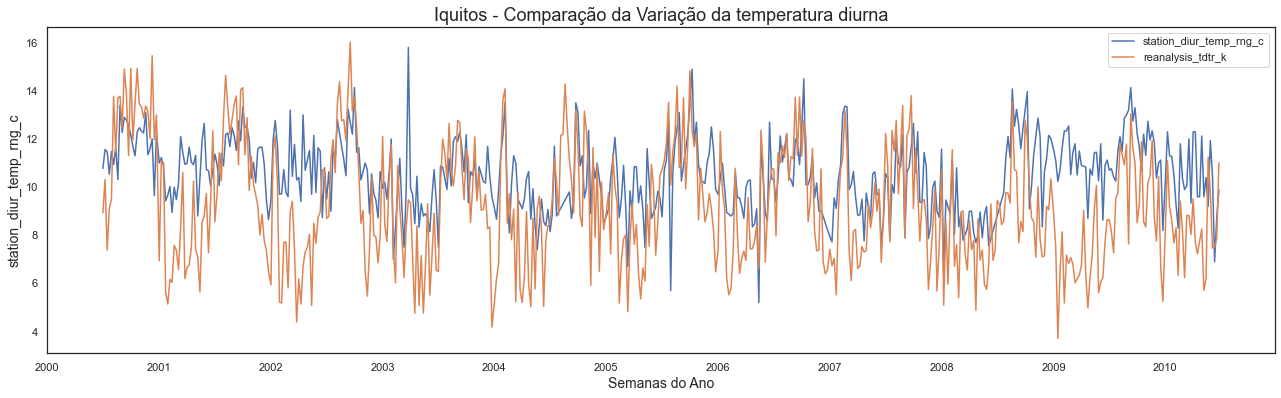

In [32]:
# Gráfico de linha
plt.figure(figsize=(22,6))
sns.lineplot(data = iq_features, y = 'station_diur_temp_rng_c', x = 'week_start_date', label = 'station_diur_temp_rng_c')
sns.lineplot(data = iq_features, y = 'reanalysis_tdtr_k', x = 'week_start_date', label = 'reanalysis_tdtr_k')

plt.title('Iquitos - Comparação da Variação da temperatura diurna')
plt.xlabel('Semanas do Ano')
plt.legend()
plt.show()

A análise da Temperatura em **Iquitos** mostra que a distribuição da Variação da Temperatura Diurna possuem valores **diferentes** em cada medição.

Curioso notar como as medições da base *GHCN-Daily* e *NCEP CSFR* são diferentes entre as duas cidades. Para **San Juan** os valores são muito mais distantes do que para **Iquitos**.

##### 4.1.3.2. Temperatura Média

Três atributos são informativos da temperatura média:

1. `station_avg_temp_k`
1. `reanalysis_air_temp_k`
1. `reanalysis_avg_temp_k`

Sendo o primeiro do *GHCN-Daily* e os dois últimos do *NCEP CFSR*.

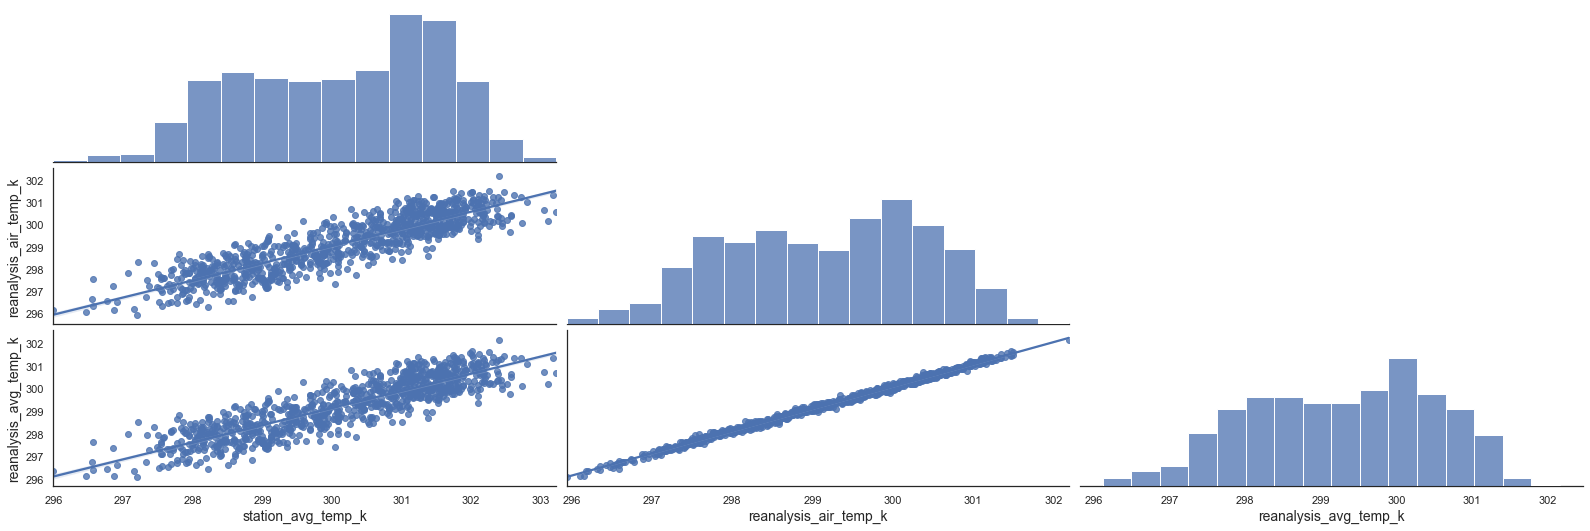

In [33]:
# Relação entre as temperaturas médias de San Juan
sns.pairplot(sj_features[['station_avg_temp_k', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k']], kind='reg', corner=True, aspect=3)
plt.show()

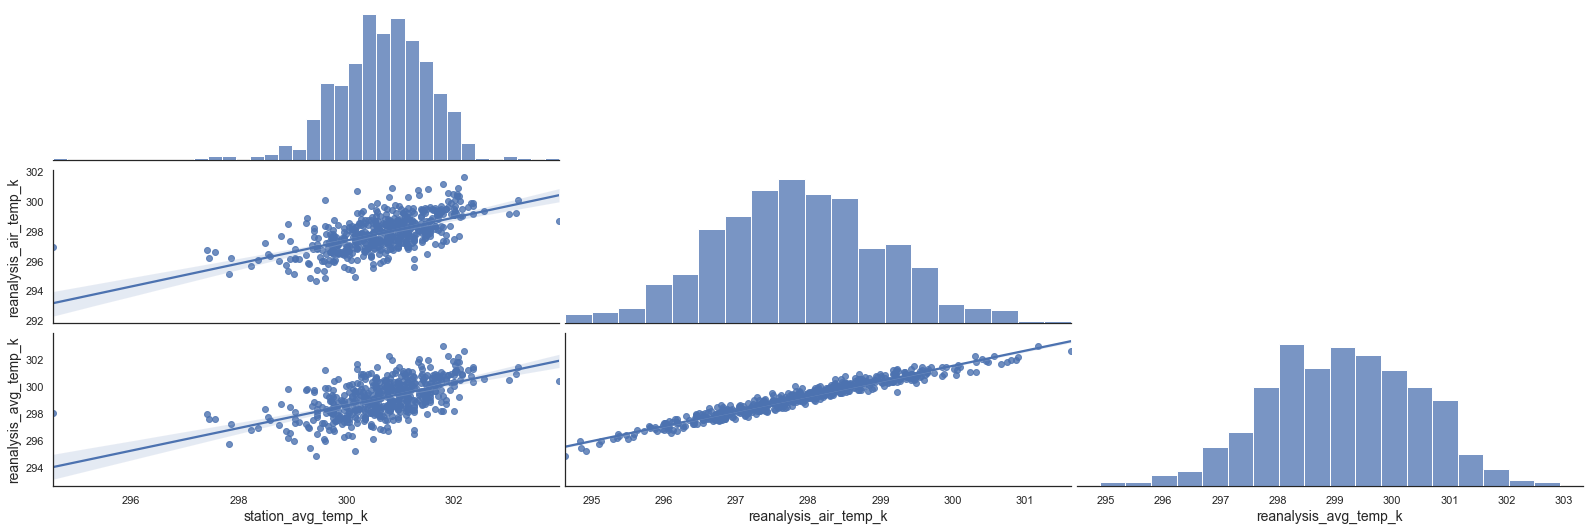

In [34]:
# Relação entre as temperaturas médias de Iquitos
sns.pairplot(iq_features[['station_avg_temp_k', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k']], kind='reg', corner=True, aspect=3)
plt.show()

Os gráficos acima mostram que os atributos oriundos do *NCEP CFSR* possuem uma correlação positiva quase perfeita tanto para San Juan quanto para Iquitos.

Comparados com os dados do *GHCN-Daily*, os dados de San Juan são mais consistentes, apresentando também uma forte correlação. Já os dados de Iquitos estão um pouco menos correlacionados, mostrando alguma diferença entre as séries das duas bases de dados.

##### 4.1.3.3. Temperaturas máximas e mínimas

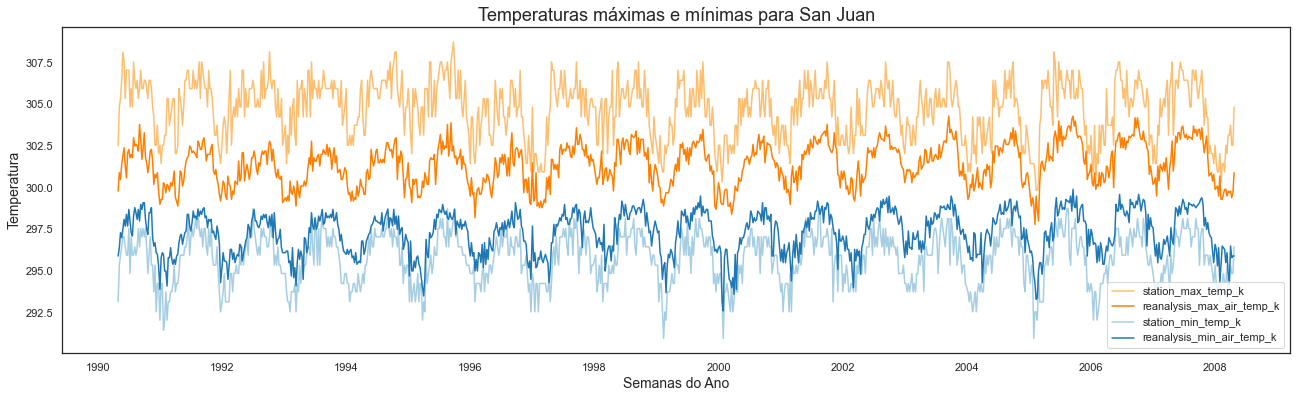

In [35]:
plt.figure(figsize=(22,6))

cmap = sns.color_palette("Paired")

# Temperaturas máximas
sns.lineplot(data = sj_features, y = 'station_max_temp_k', x = 'week_start_date', label = 'station_max_temp_k', color=cmap[6])
sns.lineplot(data = sj_features, y = 'reanalysis_max_air_temp_k', x = 'week_start_date', label = 'reanalysis_max_air_temp_k', color=cmap[7])

# Temperaturas mínimas
sns.lineplot(data = sj_features, y = 'station_min_temp_k', x = 'week_start_date', label = 'station_min_temp_k', color=cmap[0])
sns.lineplot(data = sj_features, y = 'reanalysis_min_air_temp_k', x = 'week_start_date', label = 'reanalysis_min_air_temp_k', color=cmap[1])

plt.title('Temperaturas máximas e mínimas para San Juan')
plt.xlabel('Semanas do Ano')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

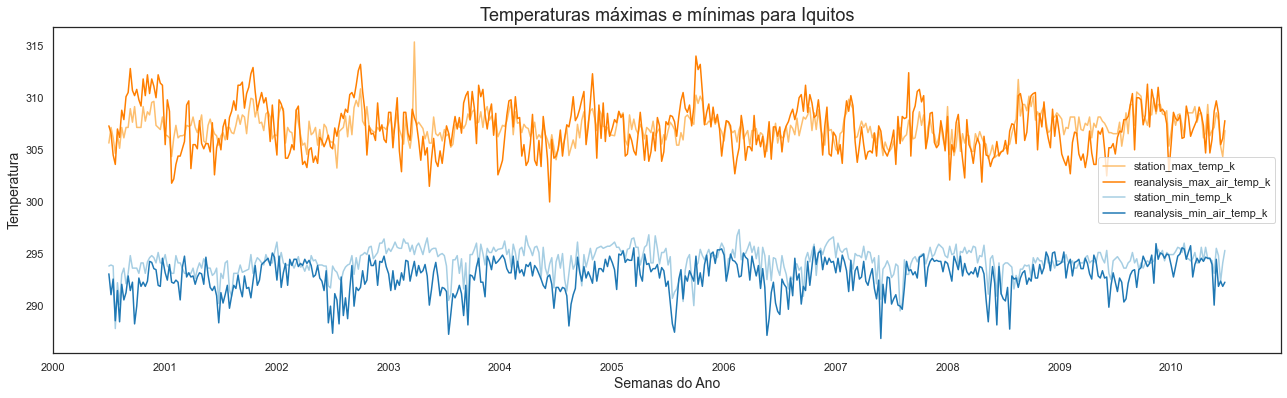

In [36]:
plt.figure(figsize=(22,6))

cmap = sns.color_palette("Paired")

# Temperaturas máximas
sns.lineplot(data = iq_features, y = 'station_max_temp_k', x = 'week_start_date', label = 'station_max_temp_k', color=cmap[6])
sns.lineplot(data = iq_features, y = 'reanalysis_max_air_temp_k', x = 'week_start_date', label = 'reanalysis_max_air_temp_k', color=cmap[7])

# Temperaturas mínimas
sns.lineplot(data = iq_features, y = 'station_min_temp_k', x = 'week_start_date', label = 'station_min_temp_k', color=cmap[0])
sns.lineplot(data = iq_features, y = 'reanalysis_min_air_temp_k', x = 'week_start_date', label = 'reanalysis_min_air_temp_k', color=cmap[1])

plt.title('Temperaturas máximas e mínimas para Iquitos')
plt.xlabel('Semanas do Ano')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

As temperaturas máximas e mínimas oscilam de forma similar entre as bases de dados e cidades consideradas. Como notado em outros atributos, parece haver um *deslocamento* entre os valores do *GHCN-Daily* e *NCEP CFSR* em San Juan. Para Iquitos, os valores das diferentes bases são mais próximos.

##### 4.1.3.4 Correlação entre as temperaturas

Como possuímos vários atributos de temperatura, pode ser interessante entender a correlação entre eles. Isto pode nos ajudar a melhor selecionar os atributos que devem ser considerado quando estivermos treinando nosso modelo de aprendizado.

Além dos atributos mostrados nos pontos anterior (de temperaturas médias, máximas e mínimas), vamos também considerar a coluna `reanalysis_dew_point_temp_k`, da temperatura do ponto de orvalho da base *NCEP CFSR*.

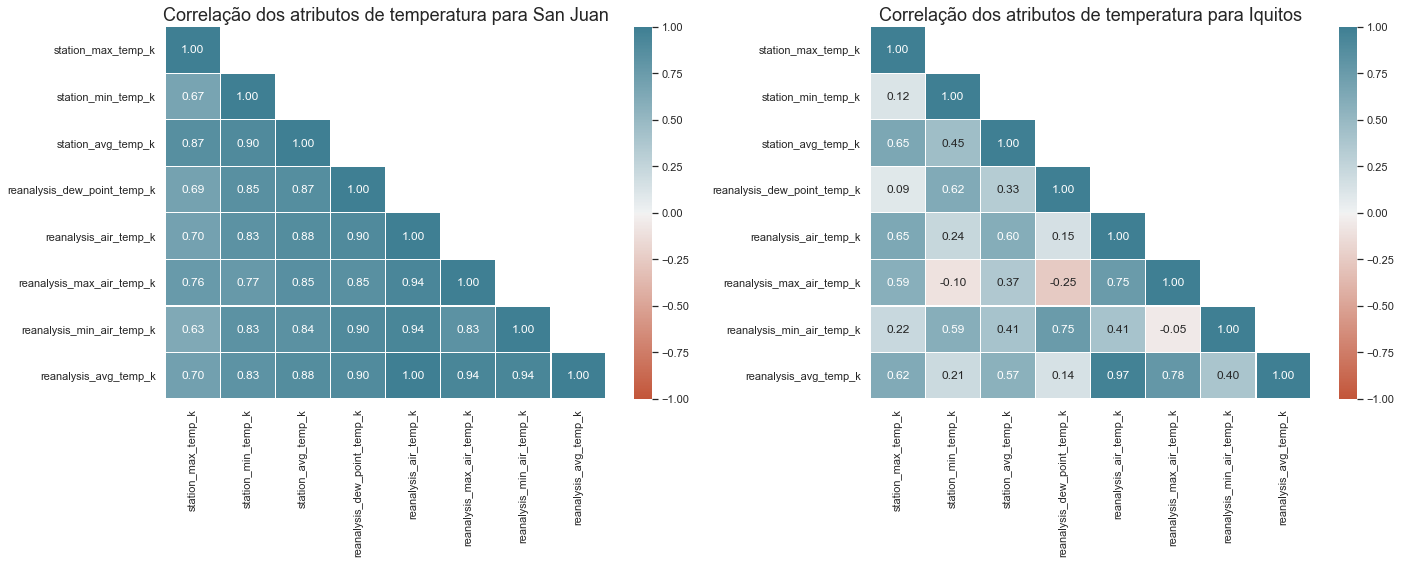

In [37]:
features_temperatura = [
    'station_max_temp_k',
    'station_min_temp_k',
    'station_avg_temp_k',
    'reanalysis_dew_point_temp_k',
    'reanalysis_air_temp_k',
    'reanalysis_max_air_temp_k',
    'reanalysis_min_air_temp_k',
    'reanalysis_avg_temp_k'
]

sj_corr = sj_features[features_temperatura].corr()
iq_corr = iq_features[features_temperatura].corr()

mask = np.zeros_like(sj_corr)
mask[np.triu_indices_from(mask, k=1)] = True

fig, axs = plt.subplots(1, 2, figsize=(20,8))

axs[0].set_title('Correlação dos atributos de temperatura para San Juan')
sns.heatmap(sj_corr, mask=mask, linewidths=.3, cmap=sns.diverging_palette(20, 220, as_cmap=True), vmin=-1, vmax=1, annot = True, fmt = '.2f', ax=axs[0])

axs[1].set_title('Correlação dos atributos de temperatura para Iquitos')
sns.heatmap(iq_corr, mask=mask, linewidths=.3, cmap=sns.diverging_palette(20, 220, as_cmap=True), vmin=-1, vmax=1, annot = True, fmt = '.2f', ax=axs[1])

plt.tight_layout()
plt.show()

Os dados de temperatura para San Juan são fortemente correlacionados entre si. O atributo `station_max_temp_k` é levemente mais distante dos outros. Mas no geral, são atributos que seguem um padrão de variação muito similar entre os registros.

Diferente do padrão observado para San Juan, os dados de temperatura de Iquitos são menos correlacionados entre si. Curioso notar que em alguns casos a correlação chega a ser (fracamente) negativa, que é contraintuitivo, uma vez que sempre esperamos que as diferentes medidas de temperatura sejam diretamente proporcionais entre si.

No momento de produzir nosso modelo, teremos que levar em conta estas diferenças entre as cidades

#### 4.1.4. Índice de Vegetação

In [38]:
# Correlação entre índices de vegetação os diferentes pontos de SJ
sj_features[['ndvi_se', 'ndvi_sw', 'ndvi_ne', 'ndvi_nw']].corr().style.background_gradient(cmap='crest')

A tabela de correlações acima nos mostra uma separação muito clara entre os índices de vegetação das regiões **norte** e **sul** de San Juan. Note como se correlacionam mais fortemente as regiões sudeste e sudoeste (0,81) e nordeste e noroeste (0,63). As outras correlações (comparando regiões ao norte com regiões ao sul) são todas fracas.

In [39]:
# Correlação entre índices de vegetação os diferentes pontos de IQ
iq_features[['ndvi_se', 'ndvi_sw', 'ndvi_ne', 'ndvi_nw']].corr().style.background_gradient(cmap='crest')

Já para Iquitos, o cenário é bem diferente. Todos os pontos de vegetação possuem [correlação forte](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson#Interpretando_%7F'%22%60UNIQ--postMath-0000000A-QINU%60%22'%7F[1]) entre si.

#### 4.1.5. Correlação dos Atribuitos

Vamons entender como é a correlação entre todas as variáveis

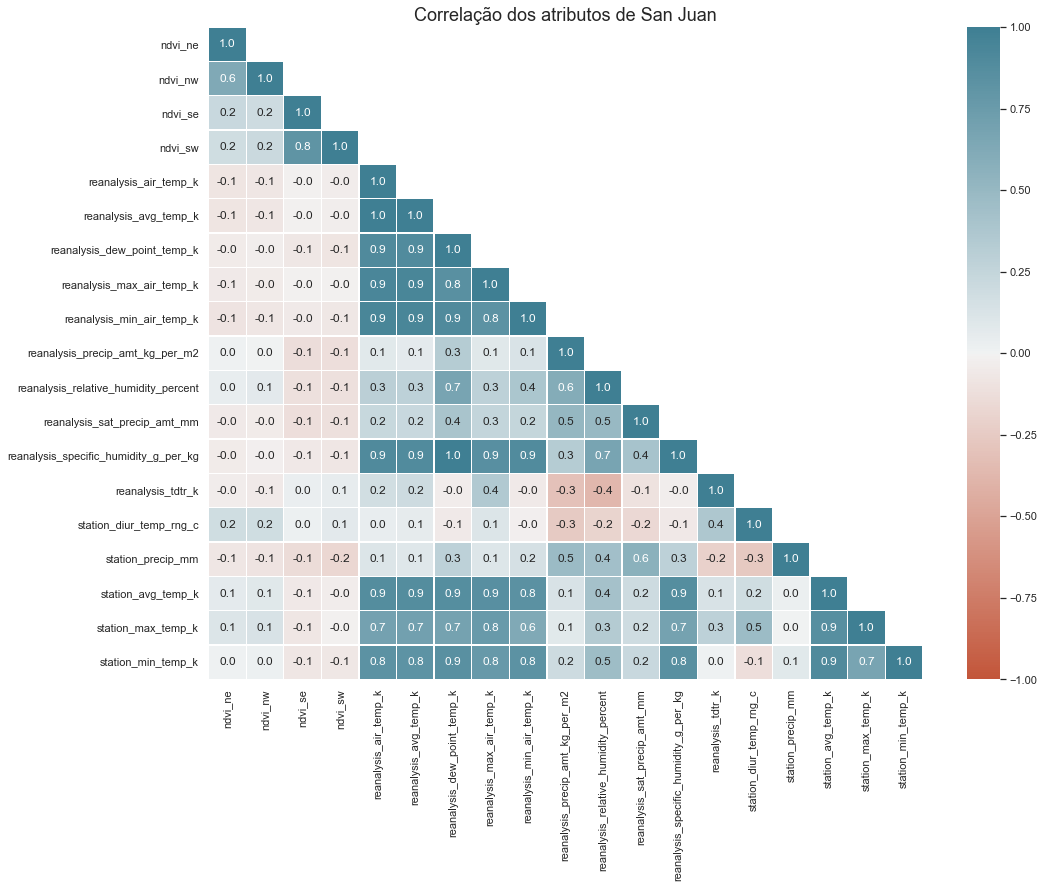

In [40]:
mask = np.zeros_like(sj_features.corr())
mask[np.triu_indices_from(mask, k=1)] = True

plt.figure(figsize=(16,12))
sns.heatmap(sj_features.corr(), linewidths=.3, cmap=sns.diverging_palette(20, 220, as_cmap=True), vmin=-1, vmax=1, annot = True, fmt = '.1f', mask = mask)
plt.title('Correlação dos atributos de San Juan')
plt.show()

Para San Juan, como havíamos notado anteriormente, existe uma forte correlação entre os atributos de temperatura. Além disso, podemos ver também uma correlação muito forte entre Umidade Específica (`reanalysis_specific_humidity_g_per_kg`) e as temperaturas.

Como também já dito anteriormente, os indíces de vegetação ao norte e ao sul correlacionam-se fortemente. Também é o caso entre a Umidade Relativa (`reanalysis_relative_humidity_percent`) e a umidade específica e a temperatura do ponto de orvalho.

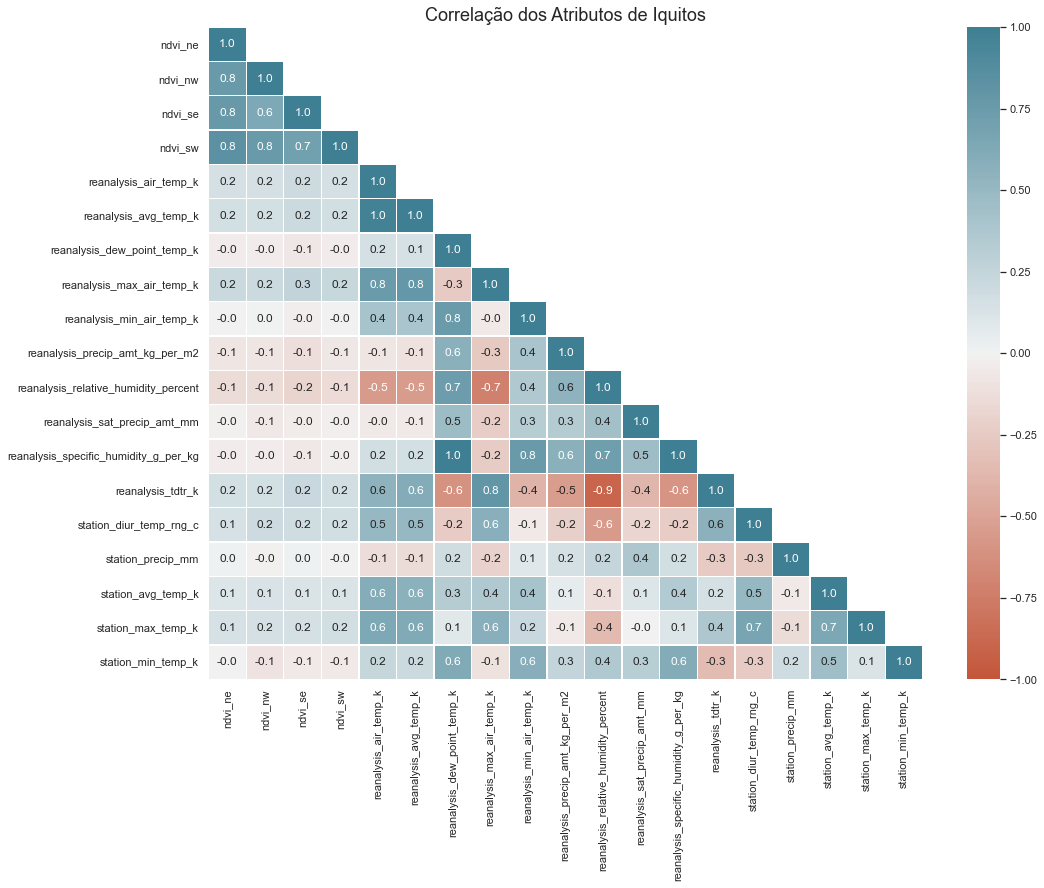

In [41]:
mask = np.zeros_like(iq_features.corr())
mask[np.triu_indices_from(mask, k=1)] = True

plt.figure(figsize=(16,12))
sns.heatmap(iq_features.corr(), linewidths=.3, cmap=sns.diverging_palette(20, 220, as_cmap=True), vmin=-1, vmax=1, annot = True, fmt = '.1f', mask = mask)
plt.title('Correlação dos Atributos de Iquitos')
plt.show()

Para Iquitos, os atributos são menos correlacionados entre si, no geral. Possuem forte correlação entre si os ìndices de Vegetação, como observado anteriormente. Também se correlacionam fortemente as temperaturas médias e as umidades entre si e com algumas temperaturas. Existe uma correlação muito forte entre umidade específica e temperatura do ponto de orvalho.

É interessante notar a correlação fortemente negativa, entre umidade relativa (`reanalysis_relative_humidity_percent`) e  variação da temperatura diurna (`reanalysis_tdtr_k`).

### 4.2. Análise dos Rótulos

In [42]:
# Total de casos das duas cidades
total_casos = pd.concat([sj_labels, iq_labels], axis=1)
total_casos.columns = ['San Juan', 'Iquitos']

In [43]:
total_casos.head(3)

San Juan  Iquitos
year weekofyear                   
1990 18               4.0      NaN
     19               5.0      NaN
     20               4.0      NaN

#### 4.2.1. Número de casos de dengue ao longo do tempo

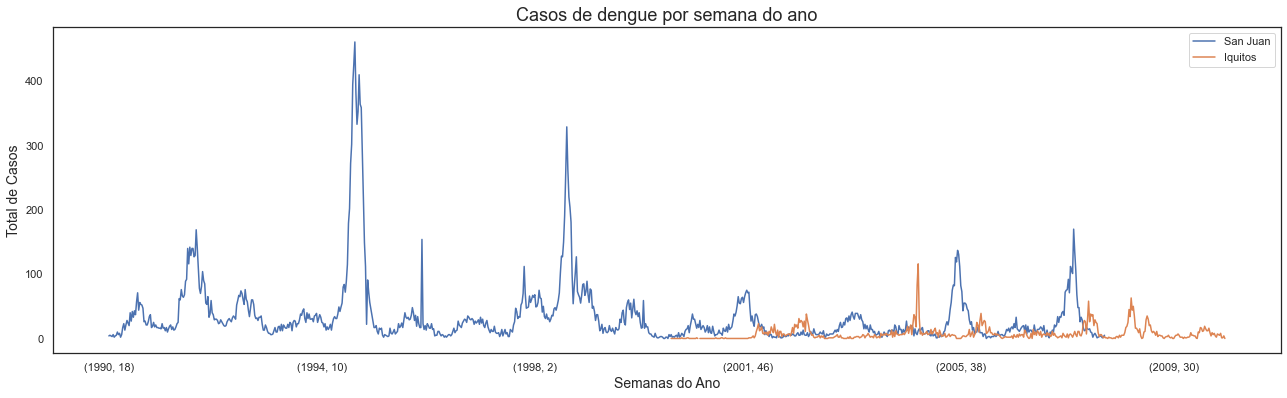

In [44]:
fig, ax = plt.subplots(figsize=(22,6))

total_casos.plot.line(ax=ax)

plt.title('Casos de dengue por semana do ano')
plt.xlabel('Semanas do Ano')
plt.ylabel('Total de Casos')
plt.show()

Podemos também agregar os casos por ano, de forma a ter uma visão mais geral do cenário

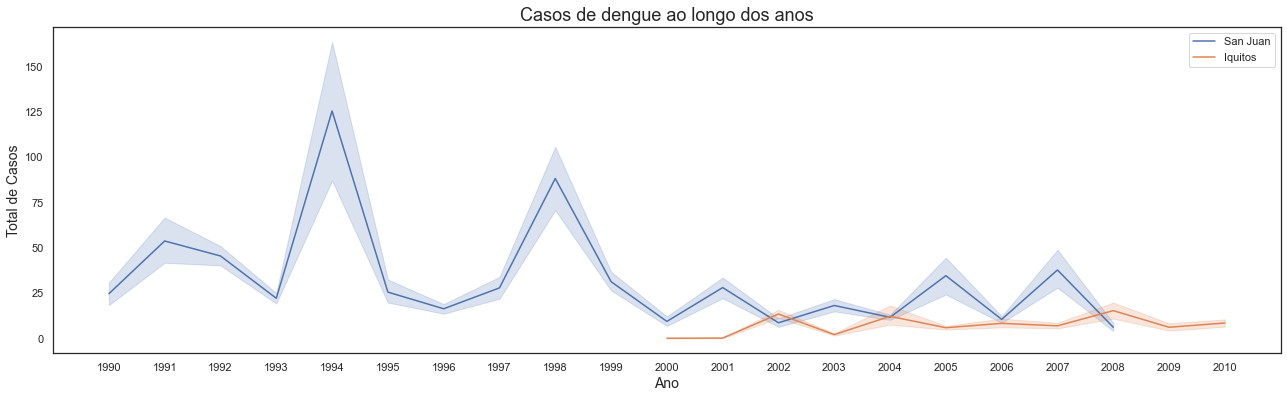

In [45]:
plt.figure(figsize=(22,6))

sns.lineplot(data = sj_labels, x = 'year', y = 'total_cases', label = 'San Juan')
sns.lineplot(data = iq_labels, x = 'year', y = 'total_cases', label = 'Iquitos')

plt.title('Casos de dengue ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Total de Casos', fontsize = 14)
plt.xticks(range(1990,2011))

plt.legend()
plt.show()

É possível ver que a quantidade de casos na cidade de San Juan é, no geral, superior aos casos da cidade de Iquitos. Existem alguns picos bem aparentes em ambas as cidades, indicando os momentos de surto epidêmico do vírus.

#### 4.2.2. Estatísticas da quantidade de casos

Vamos analisar algumas estatísticas descritivas sobre a quantidade de casos de cada uma das cidades, para entender um pouco melhor como os dados estão distribuídos.

In [46]:
total_casos.describe().round(2)

San Juan  Iquitos
count    936.00   520.00
mean      34.18     7.57
std       51.38    10.77
min        0.00     0.00
25%        9.00     1.00
50%       19.00     5.00
75%       37.00     9.00
max      461.00   116.00

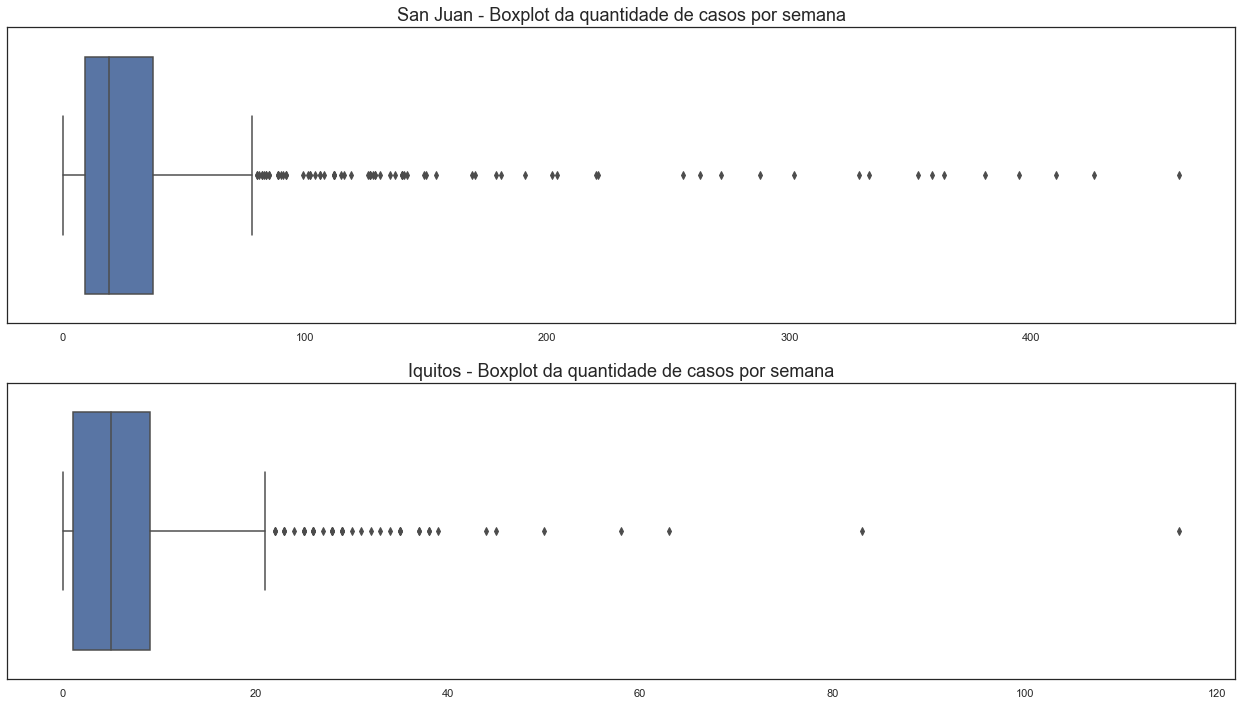

In [47]:
fig, axs = plt.subplots(2, figsize=(22,12))

sns.boxplot(x=sj_labels['total_cases'], ax = axs[0])
axs[0].set_title('San Juan - Boxplot da quantidade de casos por semana' )
axs[0].set_xlabel('')

sns.boxplot(x=iq_labels['total_cases'], ax = axs[1])
axs[1].set_title('Iquitos - Boxplot da quantidade de casos por semana')
axs[1].set_xlabel('')

plt.show()

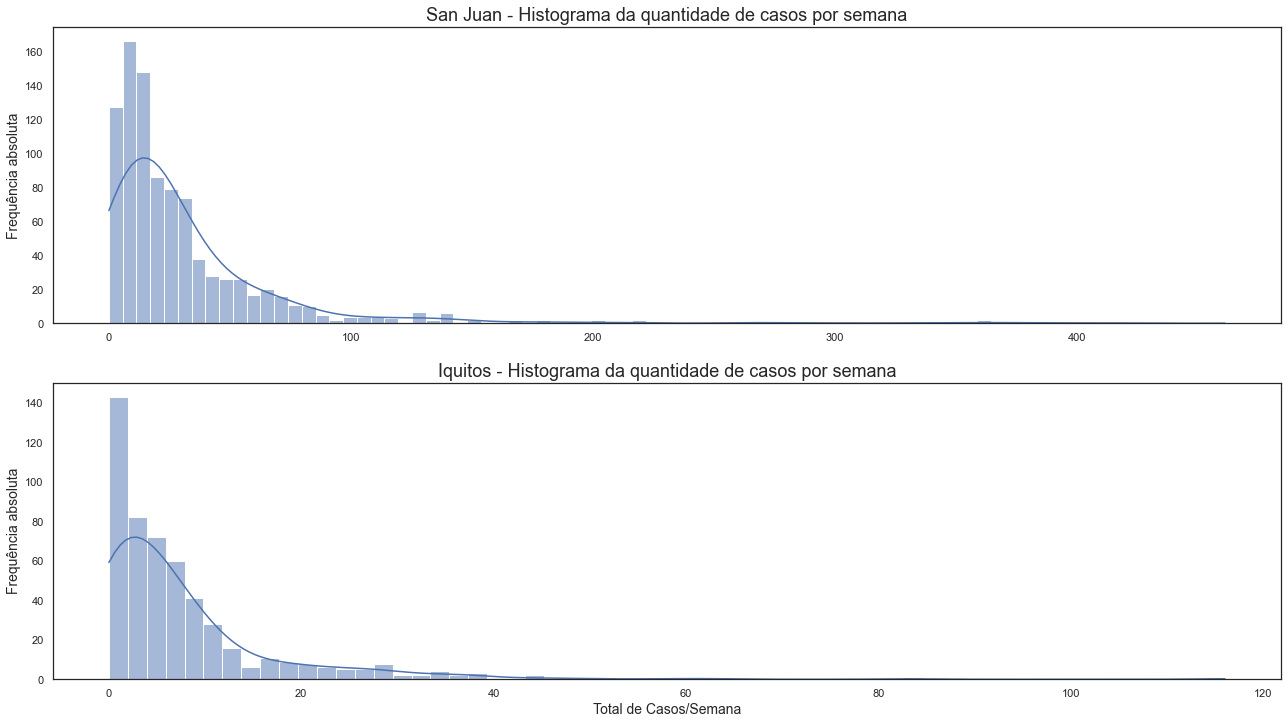

In [48]:
fig, axs = plt.subplots(2, figsize=(22,12))

sns.histplot(data = sj_labels, x = 'total_cases', ax = axs[0], kde = True)
axs[0].set_title('San Juan - Histograma da quantidade de casos por semana' )
axs[0].set_xlabel('')
axs[0].set_ylabel('Frequência absoluta')

sns.histplot(data = iq_labels, x = 'total_cases', ax = axs[1], kde = True)
axs[1].set_title('Iquitos - Histograma da quantidade de casos por semana')
axs[1].set_xlabel('Total de Casos/Semana')
axs[1].set_ylabel('Frequência absoluta')

plt.show()

Pelos gráficos e pelas estatísticas, é possível verificar que a cidade de **San Juan** tem uma quantidade média de casos superior à cidade **Iquitos**. Além disso, o desvio padrão é maior do que a média em ambas as cidades, podendo ser descrita como uma [Distribuição Binomial Negativa](https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_binomial_negativa)

#### 4.2.3. Média móvel do número de casos de dengue

Vamos fazer a média móvel baseada nos 4 últimos valores, para suavizar a curva e reduzir o ruído dos dados

In [49]:
MM_casos = total_casos.copy()
MM_casos[['MM San Juan', 'MM Iquitos']] = total_casos.rolling(4).mean()

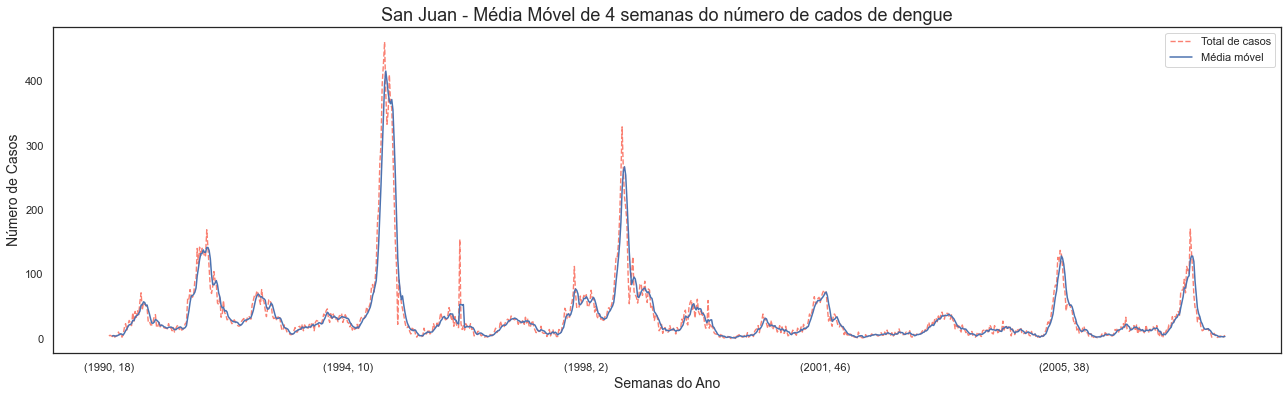

In [50]:
plt.figure(figsize=(22,6))

MM_casos['San Juan'].plot.line(lw=1.4, color='salmon', label='Total de casos', linestyle = '--')
MM_casos['MM San Juan'].plot.line(label='Média móvel')

plt.title('San Juan - Média Móvel de 4 semanas do número de cados de dengue')
plt.xlabel('Semanas do Ano')
plt.ylabel('Número de Casos')

plt.legend()
plt.show()

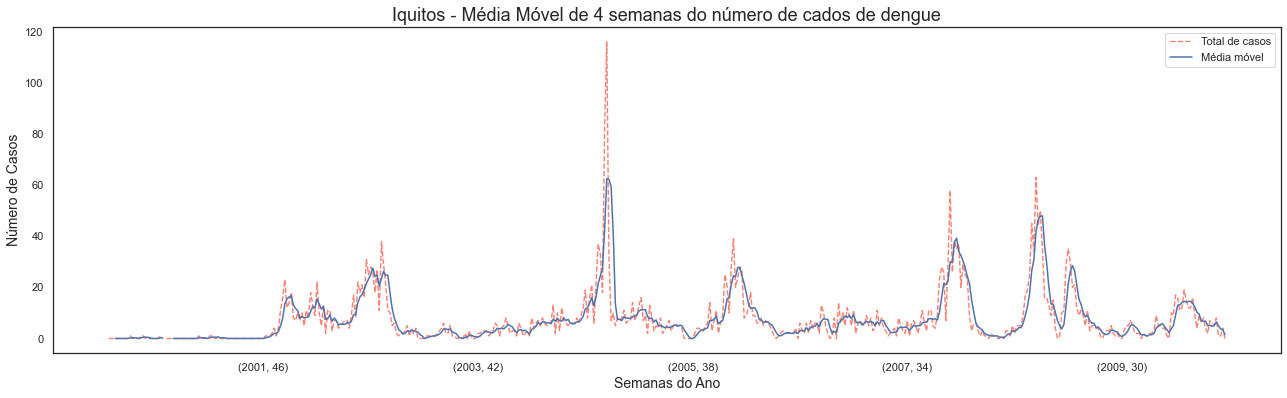

In [51]:
plt.figure(figsize=(22,6))

MM_casos['Iquitos'].plot.line(lw=1.4, color='salmon', label='Total de casos', linestyle = '--')
MM_casos['MM Iquitos'].plot.line(label='Média móvel')

plt.title('Iquitos - Média Móvel de 4 semanas do número de cados de dengue')
plt.xlabel('Semanas do Ano')
plt.ylabel('Número de Casos')

plt.legend()
plt.show()

#### 4.2.4. Tendência do número de casos ao longo dos anos

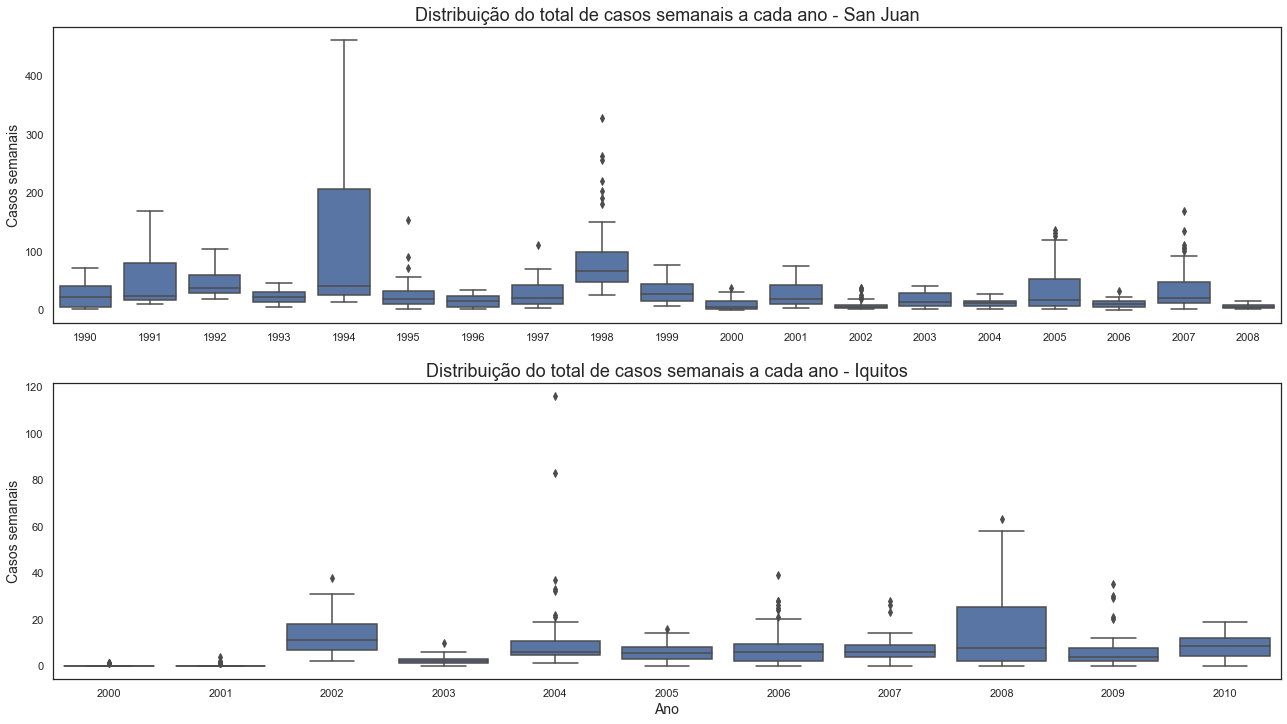

In [52]:
fig, axs = plt.subplots(2, figsize=(22,12))

sns.boxplot(data=sj_labels.reset_index(), x='year', y='total_cases', color= sns.color_palette()[0], ax=axs[0])
axs[0].set_title('Distribuição do total de casos semanais a cada ano - San Juan')
axs[0].set_xlabel('')
axs[0].set_ylabel('Casos semanais')

sns.boxplot(data=iq_labels.reset_index(), x='year', y='total_cases', color= sns.color_palette()[0], ax=axs[1])
axs[1].set_title('Distribuição do total de casos semanais a cada ano - Iquitos')
axs[1].set_xlabel('Ano')
axs[1].set_ylabel('Casos semanais')

plt.show()

Os *boxplot* de distribuição do número de casos a cada semana dentro de um ano não indicam nenhuma tendência com o passar do tempo, tanto para San Juan quanto para Iquitos. Observando as medianas, quartis e máximos do número de casos, não conseguimos traçar nenhum padrão de crescimento ou decrescimento constante.

#### 4.2.5. Sazonalidade dos casos durante o ano

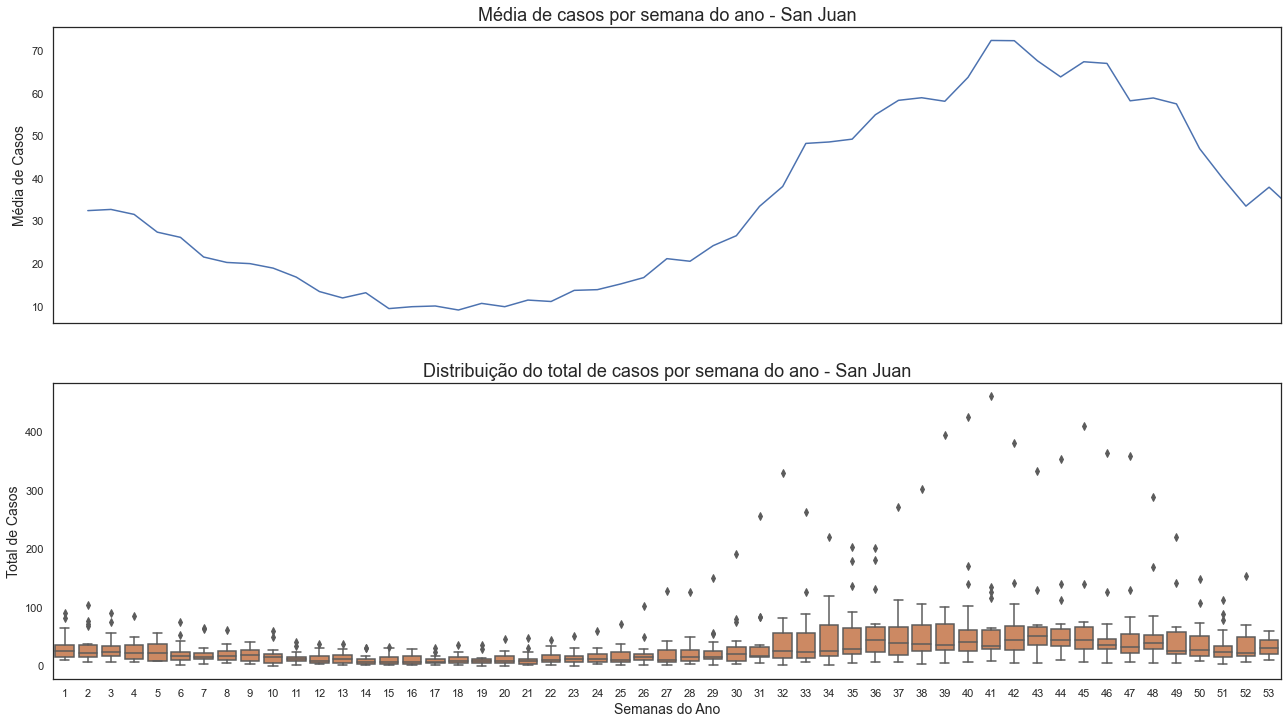

In [53]:
fig, axs = plt.subplots(2, sharex=True, figsize=(22,12))

sns.lineplot(data=sj_labels.reset_index().groupby('weekofyear')['total_cases'].mean(), ax=axs[0])
axs[0].set_title('Média de casos por semana do ano - San Juan')
axs[0].set_xlabel('')
axs[0].set_ylabel('Média de Casos')

sns.boxplot(data=sj_labels.reset_index(), x='weekofyear', y='total_cases', color= sns.color_palette()[1], ax=axs[1])
axs[1].set_title('Distribuição do total de casos por semana do ano - San Juan')
axs[1].set_xlabel('Semanas do Ano')
axs[1].set_ylabel('Total de Casos')

plt.show()

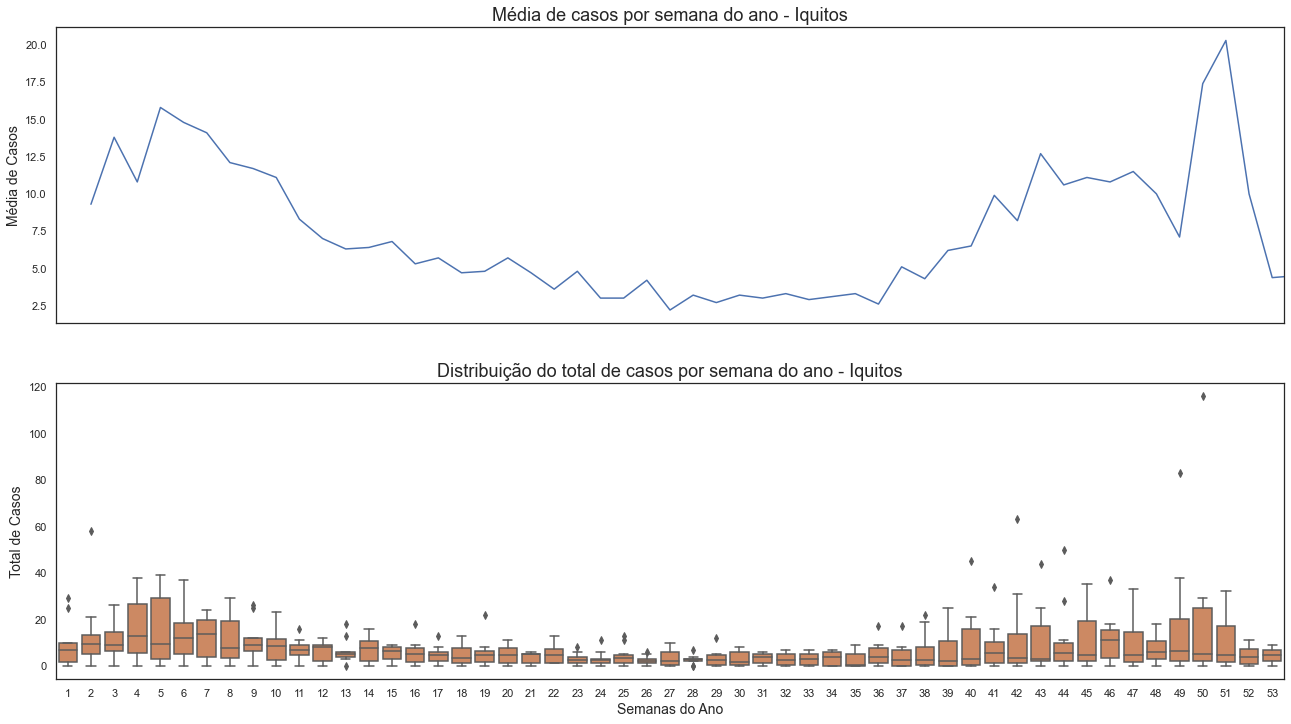

In [54]:
fig, axs = plt.subplots(2, sharex=True, figsize=(22,12))

sns.lineplot(data=iq_labels.reset_index().groupby('weekofyear')['total_cases'].mean(), ax=axs[0])
axs[0].set_title('Média de casos por semana do ano - Iquitos')
axs[0].set_xlabel('')
axs[0].set_ylabel('Média de Casos')

sns.boxplot(data=iq_labels.reset_index(), x='weekofyear', y='total_cases', color= sns.color_palette()[1], ax=axs[1])
axs[1].set_title('Distribuição do total de casos por semana do ano - Iquitos')
axs[1].set_xlabel('Semanas do Ano')
axs[1].set_ylabel('Total de Casos')

plt.show()

A curva de médias e os *boxplot* da distribuição dos casos por semana do ano mostram que os casos são sazonais.

Em San Juan, por volta da semana 28 do ano os casos começam a aumentar. O período de crescimento da doença atinge seu pico por volta da semana 40 e, a partir de então, os casos começam a apresentar uma tendência de queda até o início do ano subsequente, por volta da semana 6.

O ciclo em Iquitos começa um pouco depois, pela semana 36 do ano. O auge do contágio é por volta da semana 50 e o fim do ciclo se dá por volta da semana 12 do ano seguinte.

### 4.3. Correlação entre atributos e rótulos

Nosso próximo passo é tentar entender como os atributos independentes afetam nossa variável alvo. A primeira coisa a se fazer é adionar `total_cases` nos dados de atributos e, em seguida, examinar a correlação dessa variável com as demais

In [55]:
# Adicionando coluna 'total_cases' dos dados de labels
sj_features['total_cases'] = sj_labels['total_cases']
iq_features['total_cases'] = iq_labels['total_cases']

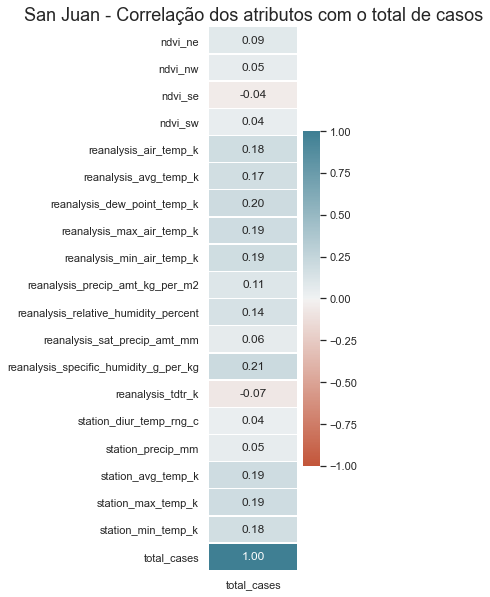

In [56]:
# Heatmap
sj_correlations = sj_features.corr()[['total_cases']]

plt.figure(figsize=(2,10))
sns.heatmap(sj_correlations, linewidths=.3, cmap=sns.diverging_palette(20, 220, as_cmap=True), vmin=-1, vmax=1, annot = True, fmt = '.2f')
plt.title('San Juan - Correlação dos atributos com o total de casos')
plt.show()

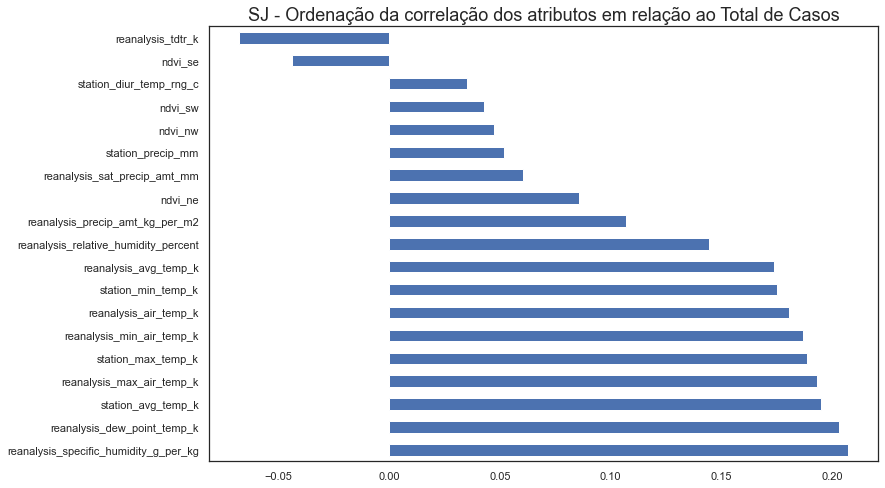

In [57]:
# Gráfico de barras horizontais ordenados pela correlação dos atributos em relação ao total_cases
plt.figure(figsize = (12,8))
sj_correlations.total_cases.drop('total_cases').sort_values(ascending=False).plot.barh()
plt.title('SJ - Ordenação da correlação dos atributos em relação ao Total de Casos')
plt.show()

Pelo Heatmap é possível ver que `total_cases` possui uma correlação baixa em relação aos atributos. O atributo `reanalysis_tdtr_k` possui a menor correlação (-0,07) e o atributo `reanalysis_specific_humidity_g_per_kg ` possui a maior correlação (0,21). 

Todos os valores estão dentro da classificação considerada como *bem fraca* ou *fraca* para o [Coeficiente de Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson)

![](http://www.parvez-ahammad.org/uploads/7/6/2/6/76266695/screen-shot-2016-10-11-at-3-00-45-pm.png)

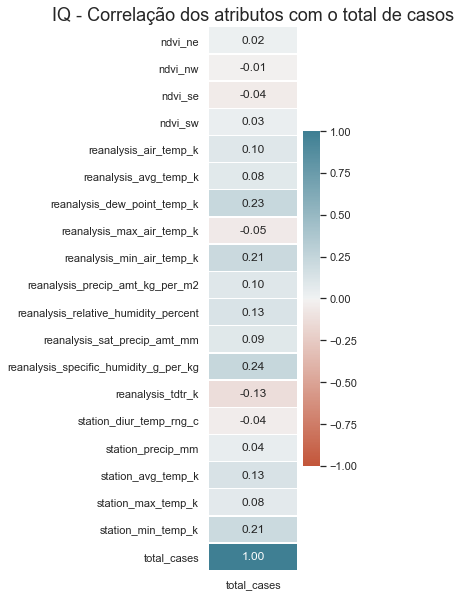

In [58]:
# Heatmap
iq_correlations = iq_features.corr()[['total_cases']]

plt.figure(figsize=(2,10))
sns.heatmap(iq_correlations, linewidths=.3, cmap=sns.diverging_palette(20, 220, as_cmap=True), vmin=-1, vmax=1, annot = True, fmt = '.2f')
plt.title('IQ - Correlação dos atributos com o total de casos')
plt.show()

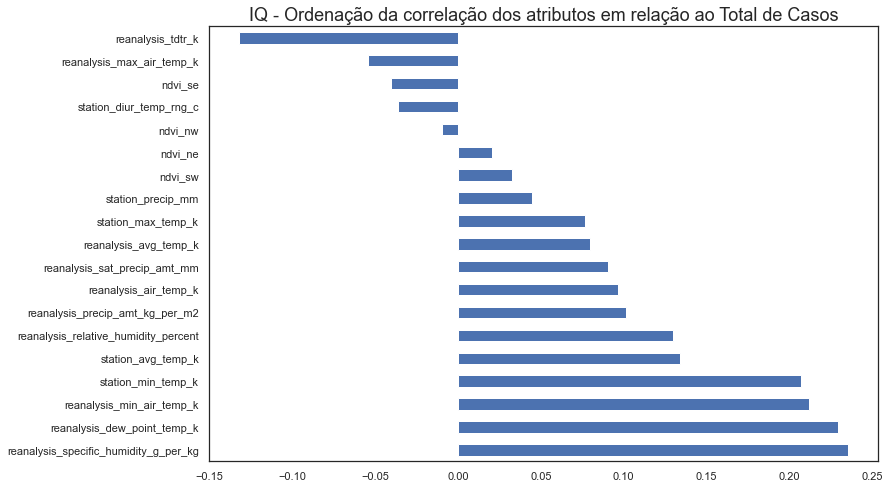

In [59]:
# Gráfico de barras horizontais ordenados pela correlação dos atributos em relação ao total_cases
plt.figure(figsize = (12,8))
iq_correlations.total_cases.drop('total_cases').sort_values(ascending=False).plot.barh()
plt.title('IQ - Ordenação da correlação dos atributos em relação ao Total de Casos')
plt.show()

Pelo Heatmap é possível ver que `total_cases` possui uma correlação baixa em relação aos atributos. O atributo `reanalysis_tdtr_k` possui a menor correlação (-0,13) e o atributo `reanalysis_specific_humidity_g_per_kg ` possui a maior correlação (0,24), sendo os mesmo atributos que do Dataset de San Juan.

Todos os valores estão dentro da classificação considerada como *bem fraca* ou *fraca* para o [Coeficiente de Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson)

![](http://www.parvez-ahammad.org/uploads/7/6/2/6/76266695/screen-shot-2016-10-11-at-3-00-45-pm.png)

## 5. Observações

Nenhum dos atributos possui, individualmente, uma correlação forte com `total_cases`. Seguem observações sobre alguns dos atributos:

1. **Umidade**

   As intensidades de correlação diferem para cada cidade, mas parece que `reanalysis_specific_humidity_g_per_kg` e `reanalysis_dew_point_temp_k` são as mais fortemente correlacionadas com `total_cases`. Isso faz sentido: sabemos que os mosquitos se desenvolvem em climas úmidos, de modo que quanto mais úmido, mais casos espera-se ter.


2. **Temperaturas**

   À medida que as temperaturas mínimas, máximas e médias aumentam, o índice `total_cases` de dengue tende a aumentar também (Correlação fraca positiva).
   

3. **Precipitação**

   Curiosamente, as medidas de `precipitação` têm correlação muito fraca com `total_cases`, apesar das fortes correlações com os atributos de `Umidade`, conforme evidenciado pelos mapas de calor acima.

## 6. Modelo de *Machine Learning*

Com base na análise exploratória realizada, começaremos a modelar um modelo de ML que indique o `total_cases` com base nos atributos. O primeiro passo será construir uma função que faça toda a etapa de pré-processamento dos dados, visto que teremos que aplicar esses ajustes tanto no conjunto de treinamento como no conjunto de testes antes de fazer as previsões.

In [60]:
def df_preprocess(data_path, labels_path=None):
    '''
    Dataset preprocessing (see section 3 for details)
    
    Parameters
    ----------
    data_path : str
        String path of features dataset csv file
    labels_path : str, optional, default ``None``
        String path of labels dataset csv file
        
    Returns
    -------
    sj : DataFrame
        San Juan dataframe with features and label
    iq : DataFrame
        Iquitos dataframe with features and label
    '''

    # Carregar os dados
    # Converter tipo do atributo `week_start_date` para datetime (seção 3.1)
    # Definir o índice para `(city, year, weekofyear)` (seção 3.2)
    df = pd.read_csv(data_path, index_col=[0, 1, 2], parse_dates=['week_start_date'])
    # Vamos manter a coluna `weekofyear` além do índice, que será usada nos modelos de ML
    df.insert(1, 'weekofyear', df.index.get_level_values('weekofyear'))
    
    # Converter unidades de medida (seção 3.3)
    df[['station_avg_temp_k', 'station_max_temp_k', 'station_min_temp_k']] = df[['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c']] + 273.15
    df.drop(columns=['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c'], inplace=True)
       
    # Remover coluna repetida `precipitation_amt_mm` (seção 4.1.1)
    df.drop(columns='precipitation_amt_mm', inplace=True)
    
    # Adicionar coluna de rótulos
    if labels_path: 
        labels = pd.read_csv(labels_path, index_col=[0, 1, 2])
        df = df.join(labels)
    
    # Separar dados de San Juan e Iquitos (seção 3.4)
    sj = df.loc['sj'] 
    iq = df.loc['iq'] 
    
    # Preencher os valores ausentes (3.5)
    sj = sj.interpolate(axis=0)
    iq = iq.interpolate(axis=0)
    
    return sj, iq

Vamos criar também uma função que calcula o erro do modelo em relação aos dados de teste

In [61]:
from sklearn.metrics import mean_absolute_error

def error_model(labels_test, predict):
    '''
    Calculate the errors for the model
    
    Parameters
    ----------
    labels_test : DataFrame
        Dataframe with test targets (true values)
    predict : list
        List of predicted values by the model
        
    Returns
    -------
    mae : float
        Mean Absoute Error of the model
    '''
    
    mae = mean_absolute_error(labels_test['total_cases'], predict)
    return mae

Por fim, vamos carregar os *datasets* e definir alguns parâmetros que serão utilizados em todos os modelos desenvolvidos. Como este é um modelo de série temporal, dividiremos a base de dados de maneira linear, deixando os dados mais atuais para validar o modelo. Usaremos 80% da base para treino e o restante para teste. Faremos isso separadamente para os dados de San Juan e de Iquitos.

In [62]:
# Carregar datasets e realizar pré-processamento
sj, iq = df_preprocess(features_path, labels_path=labels_path)

# Proporção de dados para treinamento
train_size = 0.8

# Definir quantidade de dados para treinamento
sj_train_size = int(sj.shape[0] * train_size)
iq_train_size = int(iq.shape[0] * train_size)

# Dividir as bases de treinamento e teste
sj_train = sj.head(sj_train_size)
sj_test  = sj.tail(sj.shape[0] - sj_train_size)

iq_train = iq.head(iq_train_size)
iq_test  = iq.tail(iq.shape[0] - iq_train_size)

### 6.1. Modelo *baseline*

#### 6.1.1. Definindo o modelo

Como primeiro passo, vamos criar um modelo de base (*baseline*) para servir de comparação com os modelos criados. Neste modelo vamos considerar que `total_case` é uma variável temporal, e não utilizaremos nenhum atributo na modelagem.

Para a criação de modelos temporais podemos levar em conta alguns parâmetros:

- **Modelo AR**: Modelo baseado na autocorrelação e autocorrelação parcial
- **Modelo MA**: Modelo baseado em média móvel
- **Modelo ARMA**: Modelo baseado em autocorrelação e média móvel
- **Modelo ARIMA**: Adiciona a informação de diferenciação no modelo ARMA, retirando a tendencia dos dados  
- **Modelo SARIMA**:Adiona componente sazonal no modelo ARIMA

Como o objetivo do modelo temporal é apenas servir de *baseline*, vamos verificar se a série temporal se ajusta a um modelo ARMA. Para tanto, vamos inicialmente verificar os gráficos das funções de *autocorrelação* (ACF) e *autocorrelação parcial* (PACF) para [identificar a ordem dos parâmetros do modelo](https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8).

A **autocorrelação** verifica se os dados anteriores intereferem nos valores dos dados futuros. A **autocorrelação parcial** retira o efeito do *LAG 0* desse cálculo (efeito da função sobre ela mesma). Para verificar a autocorrelação e a autocorrelação parcial, podemos usar as funções `plot_acf` e `plot_pacf` da biblioteca `statsmodels`.

In [63]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

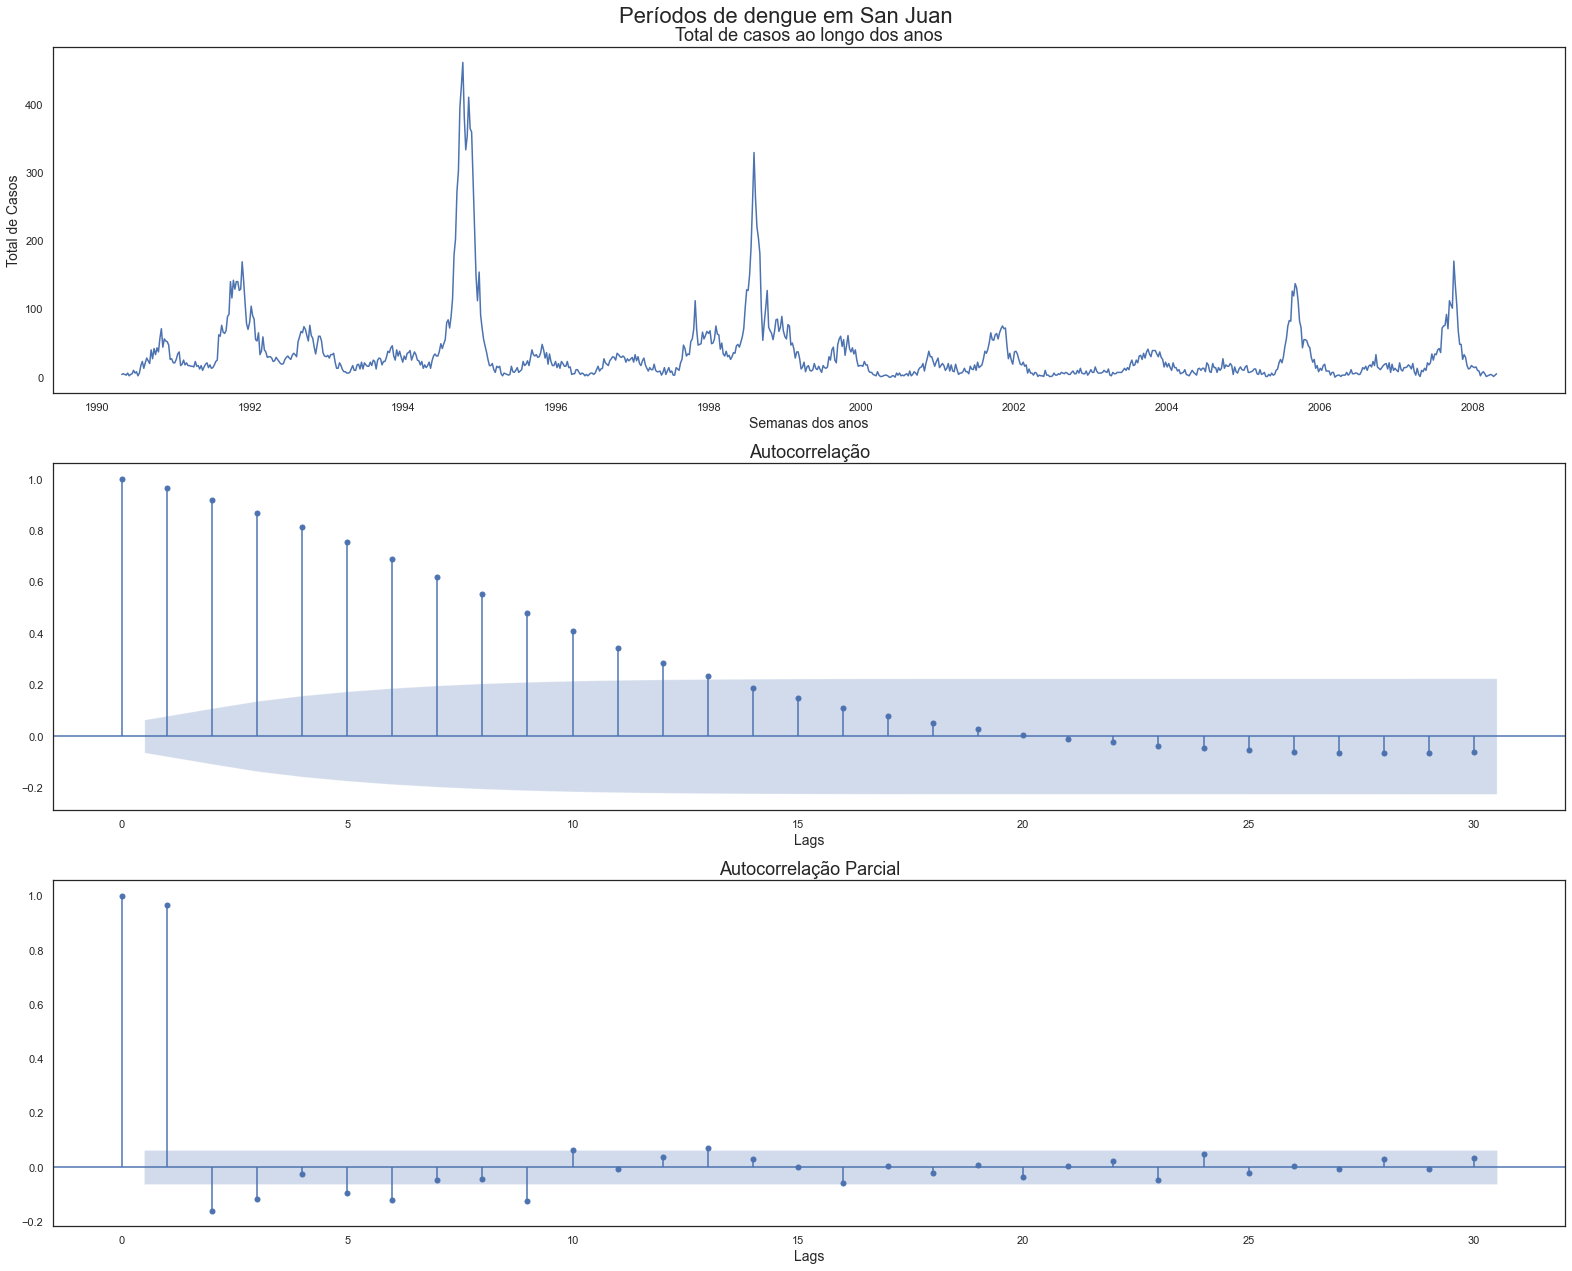

In [64]:
# San Juan
fig, axs = plt.subplots(3, figsize=(22,18))

sns.lineplot(data=sj, x='week_start_date', y='total_cases', ax=axs[0])
axs[0].set(title='Total de casos ao longo dos anos', xlabel='Semanas dos anos', ylabel='Total de Casos')

plot_acf(sj['total_cases'], ax=axs[1])
axs[1].set(title='Autocorrelação', xlabel='Lags')

plot_pacf(sj['total_cases'], ax=axs[2])
axs[2].set(title='Autocorrelação Parcial', xlabel='Lags')

plt.suptitle('Períodos de dengue em San Juan', fontsize=22)
plt.tight_layout()
plt.show()

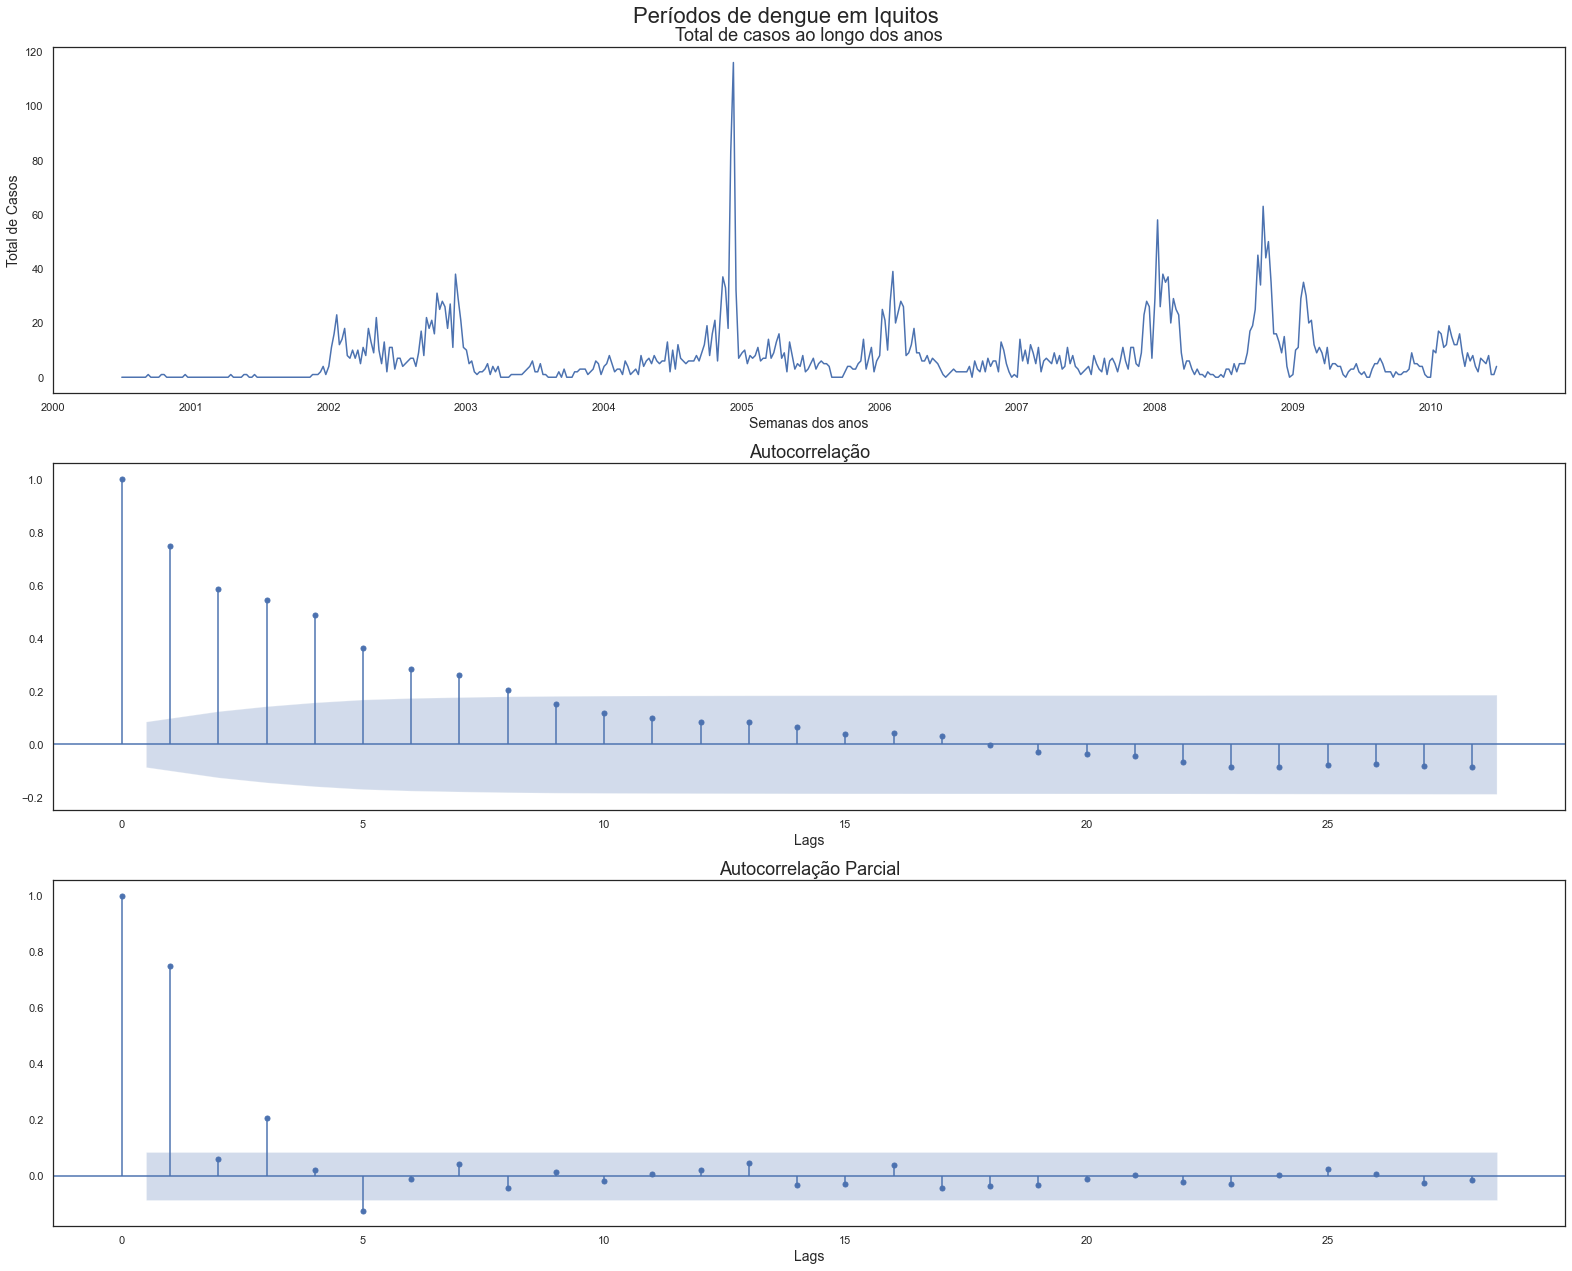

In [65]:
# Iquitos
fig, axs = plt.subplots(3, figsize=(22,18))

sns.lineplot(data=iq, x='week_start_date', y='total_cases', ax=axs[0])
axs[0].set(title='Total de casos ao longo dos anos', xlabel='Semanas dos anos', ylabel='Total de Casos')

plot_acf(iq['total_cases'], ax=axs[1])
axs[1].set(title='Autocorrelação', xlabel='Lags')

plot_pacf(iq['total_cases'], ax=axs[2])
axs[2].set(title='Autocorrelação Parcial', xlabel='Lags')

plt.suptitle('Períodos de dengue em Iquitos', fontsize=22)
plt.tight_layout()
plt.show()

Os modelos autoregressivos, tanto para San Juan quanto para Iquitos, possuem uma distribuição em que a **autocorrelação possui um decaimento suave** e a **autocorrelação parcial reduz de forma abrupta**. Dessa forma, um **Modelo AR** é [mais apropriado para modelagem](https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8) da série temporal. Como notamos na análise exploratória, vamos adicionar uma componente sazonal no modelo.

#### 6.1.2. Construção do modelo

Para montar um modelo AR, podemos usar o método [`AutoReg`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AutoReg.html) da `statsmodels`.

In [66]:
from statsmodels.tsa.ar_model import AutoReg

def baseline_training(train_df, target='total_cases'):
    
    # Número de lags a serem incluídas no modelo
    lags = 13 # Valor com nível de significância maior que 5% para San Juan (maior que Iquitos)
    
    # Definições do modelo
    trend    = 'n'  # --> Nenhuma tendência
    seasonal = True # --> Modelo Sazonal (Resultados anuais)
    period   = 52   # --> Período de Sazonalidade (um ano)
    
    baseline_model = AutoReg(train_df[target].values, lags=lags, trend=trend, seasonal=seasonal, period=period, old_names=True)
    baseline_results = baseline_model.fit()
    
    return baseline_results

#### 6.1.3. Avaliação do modelo

Para avaliar o modelo, vamos realizar previsões das dats futuras às do *dataset* de treinamento, por um período que corresponde aos dados de teste. Em seguida construímos os gráficos comparativos entre os valores reais e previstos.

In [67]:
# Prever os casos no DF de teste
sj_baseline, iq_baseline = baseline_training(sj_train), baseline_training(iq_train)
sj_baseline_predict = sj_baseline.predict(start=len(sj_train), end=(len(sj_train) + len(sj_test) - 1)).astype(int)
iq_baseline_predict = iq_baseline.predict(start=len(iq_train), end=(len(iq_train) + len(iq_test) - 1)).astype(int)

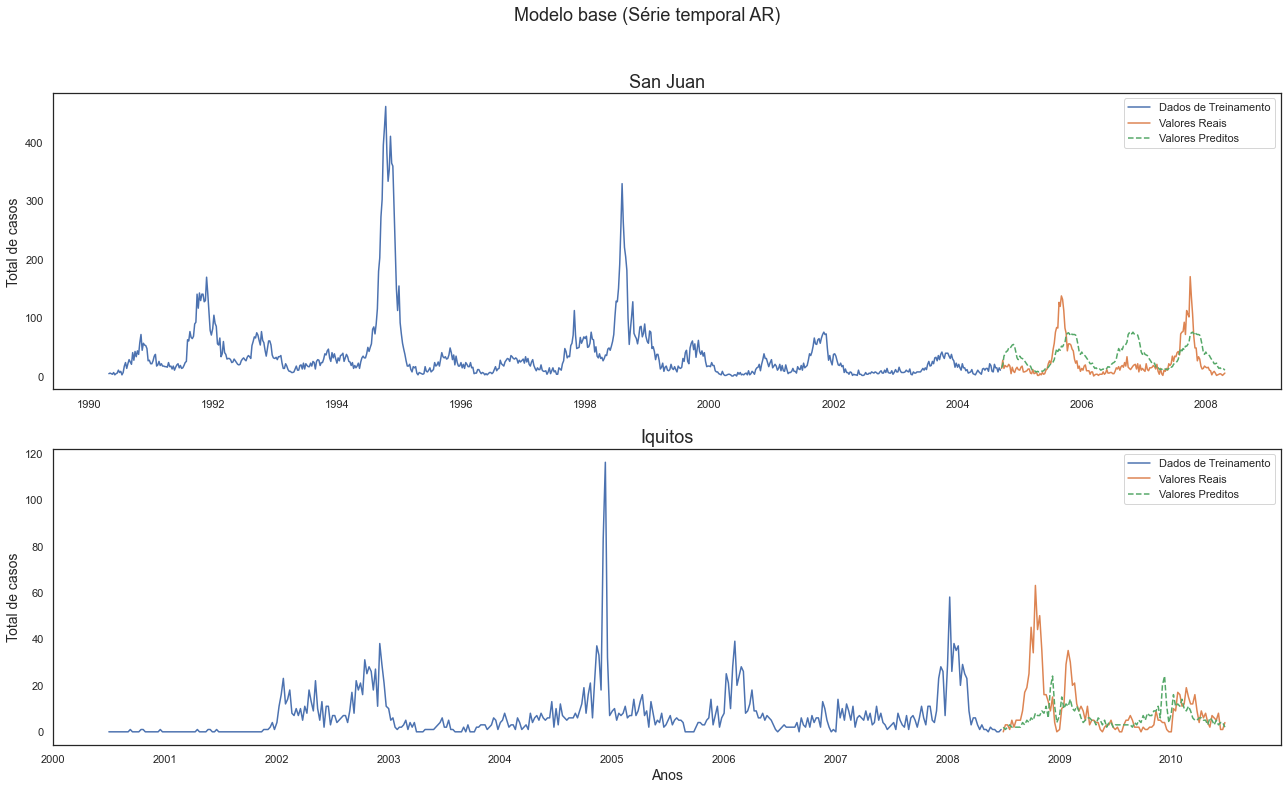

In [68]:
# Gráficos do modelo base
fig, axs = plt.subplots(2, figsize=(22, 12))

sns.lineplot(data=sj_train, x='week_start_date', y='total_cases', label='Dados de Treinamento', ax=axs[0])
sns.lineplot(data=sj_test,  x='week_start_date', y='total_cases', label='Valores Reais', ax=axs[0])
sns.lineplot(data=sj_test,  x='week_start_date', y=sj_baseline_predict, linestyle='--', label='Valores Preditos', ax=axs[0])
axs[0].set_title('San Juan')
axs[0].set_xlabel('')
axs[0].set_ylabel('Total de casos')

sns.lineplot(data=iq_train, x='week_start_date', y='total_cases', label='Dados de Treinamento', ax=axs[1])
sns.lineplot(data=iq_test,  x='week_start_date', y='total_cases', label='Valores Reais', ax=axs[1])
sns.lineplot(data=iq_test,  x='week_start_date', y=iq_baseline_predict, linestyle='--', label='Valores Preditos', ax=axs[1])
axs[1].set_title('Iquitos')
axs[1].set_xlabel('Anos')
axs[1].set_ylabel('Total de casos')

plt.suptitle("Modelo base (Série temporal AR)", fontsize=18)
plt.show()

A métrica de avaliação utilizada na competição pelo DrivenData é do [Erro Médio Absoluto](https://en.wikipedia.org/wiki/Mean_absolute_error). Vamos então calcular este erro para nossos modelos.

In [69]:
MAE = pd.DataFrame(index = ['San Juan', 'Iquitos', 'Geral'])

sj_baseline_mae = error_model(sj_test, sj_baseline_predict)
iq_baseline_mae = error_model(iq_test, iq_baseline_predict)
baseline_mae = error_model(pd.concat([sj_test, iq_test]), np.concatenate([sj_baseline_predict, iq_baseline_predict]))

MAE['Baseline'] = sj_baseline_mae, iq_baseline_mae, baseline_mae
MAE.round(2).T

San Juan  Iquitos  Geral
Baseline     22.82     6.71  17.08

O modelo *baseline* teve um Erro Médio Absoluto de `17,08`, sendo o erro de `22,82` para os dados de **San Juan** e de `6,71` para os dados de **Iquitos**

### 6.2. Modelo Binomial Negativo

O modelo escolhido é o de regressão para uma função linear de [distribuição Binomial Negativa](https://en.wikipedia.org/wiki/Negative_binomial_distribution), um modelo que muitas vezes é utilizado para dados de contagem em que a média e a variância são muito diferentes.

O [modelo estatístico da distribuição binomial negativa](https://www.statsmodels.org/stable/glm.html#technical-documentation) aproxima uma função do valor médio esperado ($\mu$) e um parâmetro auxiliar $\alpha$, ou seja:

$$
X \sim \mathit{NB}(\mu, \alpha)
$$

Neste caso, $\mu$ é a expectativa de obter valores de $Y$ (variável dependente) dado os valores das variáveis independentes $x$, ou seja, $E[Y|x] = \mu$.

Em suma, para aplicar o modelo desejado, precisamos definir o valor de $\alpha$. Vamos fazer isso de duas formas distintas a seguir.

Os modelos todos serão implementados utilizando a classe de *Generalized Linear Models* ([GLM](https://www.statsmodels.org/stable/glm.html)) da biblioteca `statsmodels`, em especial os modelos da [família Binomial Negativa](https://www.statsmodels.org/stable/generated/statsmodels.genmod.families.family.NegativeBinomial.html). Vamos utilizar a notação de [formula](https://www.statsmodels.org/stable/example_formulas.html) para definir as variáveis do modelo.

In [70]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#### 6.2.1. Varredura pelo melhor valor de $\alpha$

A primeira forma de encontrarmos $\alpha$ será realizando testes com vários valores dentro de uma determinada faixa e verificando como nosso modelo se comporta em cada caso. Ou seja, vamos treinar nosso modelo binomial negativo para diversos valores de $\alpha$ e calcular o erro do modelo (utilizando os dados de teste). O valor de $\alpha$ que produzir o modelo com menor erro será o escolhido.

In [71]:
def nb_search_training(train_df, test_df, features=None, target='total_cases'):
    
    # Utilizar todas as variáveis independentes como features
    if features == None:
        features = train_df.columns[train_df.columns != target]
    
    # Especificar a formula do modelo
    formula = f'{target} ~ 1' # `1` no segundo termo é o intercepto
    if len(features) > 0:
        formula += ' + ' + ' + '.join(features)
    
    # Definir o range de busca do alfa
    grid = 10 ** np.arange(-10, 2, dtype=np.float64)
    
    # Iniciano valor min_error com valor alto
    min_error = 1000
    best_alpha = None
    best_results = None
    
    # Buscar pelo melhor parâmetro alfa
    for alpha in grid:
        # Construir o modelo e treinar
        model = smf.glm(formula=formula, data=train_df, family=sm.families.NegativeBinomial(alpha=alpha))
        results = model.fit()
        
        # Predizer valores do DF teste e calcular o erro
        predictions = results.predict(test_df).astype(int)
        error = error_model(test_df, predictions)
            
        # Verificar se o modelo possui o menor erro
        if error < min_error:
            best_alpha = alpha
            best_results = results
            min_error = error
    
    return best_results, best_alpha

#### 6.2.2. Cálculo prévio de $\alpha$

[Outra forma](https://towardsdatascience.com/negative-binomial-regression-f99031bb25b4) de encontrar o valor de $\alpha$ seria utilizando a seguinte fórmula:

$$
\frac{(y_i - \lambda_i)^2 - \lambda_i}{\lambda_i} = \alpha * \lambda_i + 0
$$

Nesta equação, para o $i$-ésimo registro do *dataset*, $y_i$ se refere o rótulo do registro (`total_cases`) e $\lambda_i$ se refere à *taxa do evento*. Para encontrar os valores do vetor $\lambda$, vamos aplicar uma [regressão de Poisson](https://en.wikipedia.org/wiki/Poisson_regression) aos nosso dados. Tendo os vetores $y$ e $\lambda$, conseguimos resolver o lado esquerdo da equação acima, e reduzimos nossa equação a uma regressão *[Ordinary Least Squares (OLS)](https://en.wikipedia.org/wiki/Ordinary_least_squares)*, com o coeficiente sendo o valor de $\alpha$ e intercepto igual a $0$.

| ![](https://miro.medium.com/1*88KV30WQFC_MUctTtSqRHQ.png) |
|:--:|
| *Imagem por [Sachin Date](https://sachin-date.medium.com)* |

In [72]:
def lambda_vector(train_df, formula):    
    # Treinar o modelo de regressão utilziando Poisson
    poisson_train_model = smf.glm(formula=formula, data=train_df, family=sm.families.Poisson())
    poisson_train_results = poisson_train_model.fit()
    
    return poisson_train_results.mu

def ols_dependent(target_array, lambda_array):
    return ((target_array - lambda_array)**2 - lambda_array) / lambda_array

def ols_regression(ols_df, ols_y, rate):
    # Especificar a fórmula do modelo
    # `-1` no final é para indicar intercepto = 0
    formula = f'{ols_y} ~ {rate} - 1' 
    
    # Treinar modelo de regressão OLS
    ols_train_model = smf.ols(formula=formula, data=ols_df)
    ols_train_results = ols_train_model.fit()

    # Valor de alpha é retornado (coeficiente da regressão)
    return ols_train_results.params[0]
    
def nb_calculate_training(train_df, features=None, target='total_cases'):
    
    # Utilizar todas as variáveis independentes como features
    if features == None:
        features = train_df.columns[train_df.columns != target]
    
    # Especificar a formula do modelo
    formula = f'{target} ~ 1' # `1` no segundo termo é o intercepto
    if len(features) > 0:
        formula += ' + ' + ' + '.join(features)
    
    # Ober o vetor lamda
    rate = lambda_vector(train_df, formula)
    # Ober o termo dependente da equação de regressão OLS
    ols_y = ols_dependent(train_df[target], rate)
    ols_df = pd.DataFrame({
        'rate': rate,
        'ols_y': ols_dependent(train_df[target], rate)
    })
    
    # Obter alpha a partir da regressão OLS
    alpha = ols_regression(ols_df, 'ols_y', 'rate')

    # Treinar o modelo de regressão utilziando a distribuição binomial negativa
    nb_train_model = smf.glm(formula=formula, data=train_df, family=sm.families.NegativeBinomial(alpha=alpha))
    nb_train_results = nb_train_model.fit()
    
    return nb_train_results, alpha

#### 6.2.3. Avaliação do modelo

Para cada uma das duas versões do modelo criadas, vamos rodar um conjunto de testes considerando diferentes atributos para treinamento.

1. Nenhum atributo: com objetivo de avaliar como o modelo se comporta sem nenhuma variável independente, apenas com os valores do rótulo
1. Todos atributos (com execessão de `week_start_date`): avaliação considerando toda informação de entrada disponível
1. Subconjunto de atributos: a partir da análise exploratória, utilizando os 4 atributos mais fortemente correlaciados com o total de casos: `reanalysis_specific_humidity_g_per_kg`, `reanalysis_dew_point_temp_k`, `station_avg_temp_k`, `station_min_temp_k`

In [73]:
features_to_test = [
    [],
    list(sj_train.columns[1:-1]),
    ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'station_avg_temp_k', 'station_min_temp_k']
]

PARAMS = pd.DataFrame(index=['sj alpha', 'sj pred_values', 'iq alpha', 'iq pred_values'])

for i, features in enumerate(features_to_test):
    # Modelo 6.2.1
    sj_model, sj_alpha = nb_search_training(sj_train, sj_test, features)
    iq_model, iq_alpha = nb_search_training(iq_train, iq_test, features)
    sj_pred = sj_model.predict(sj_test).astype(int)
    iq_pred = iq_model.predict(iq_test).astype(int)
    
    MAE[f'nb_search {i}'] = error_model(sj_test, sj_pred), error_model(iq_test, iq_pred), error_model(pd.concat([sj_test, iq_test]), np.concatenate([sj_pred, iq_pred]))
    PARAMS[f'nb_search {i}'] = [sj_alpha, sj_pred, iq_alpha, iq_pred]
    
    # Modelo 6.2.2
    sj_model, sj_alpha = nb_calculate_training(sj_train, features)
    iq_model, iq_alpha = nb_calculate_training(iq_train, features)
    sj_pred = sj_model.predict(sj_test).astype(int)
    iq_pred = iq_model.predict(iq_test).astype(int)
    
    MAE[f'nb_calculate {i}'] = error_model(sj_test, sj_pred), error_model(iq_test, iq_pred), error_model(pd.concat([sj_test, iq_test]), np.concatenate([sj_pred, iq_pred]))
    PARAMS[f'nb_calculate {i}'] = [sj_alpha, sj_pred, iq_alpha, iq_pred]
    
MAE.round(2).T

San Juan  Iquitos  Geral
Baseline           22.82     6.71  17.08
nb_search 0        27.85     7.27  20.52
nb_calculate 0     27.85     7.27  20.52
nb_search 1        23.08     7.21  17.43
nb_calculate 1     23.13     7.52  17.57
nb_search 2        24.27     6.82  18.05
nb_calculate 2     24.28     7.17  18.18

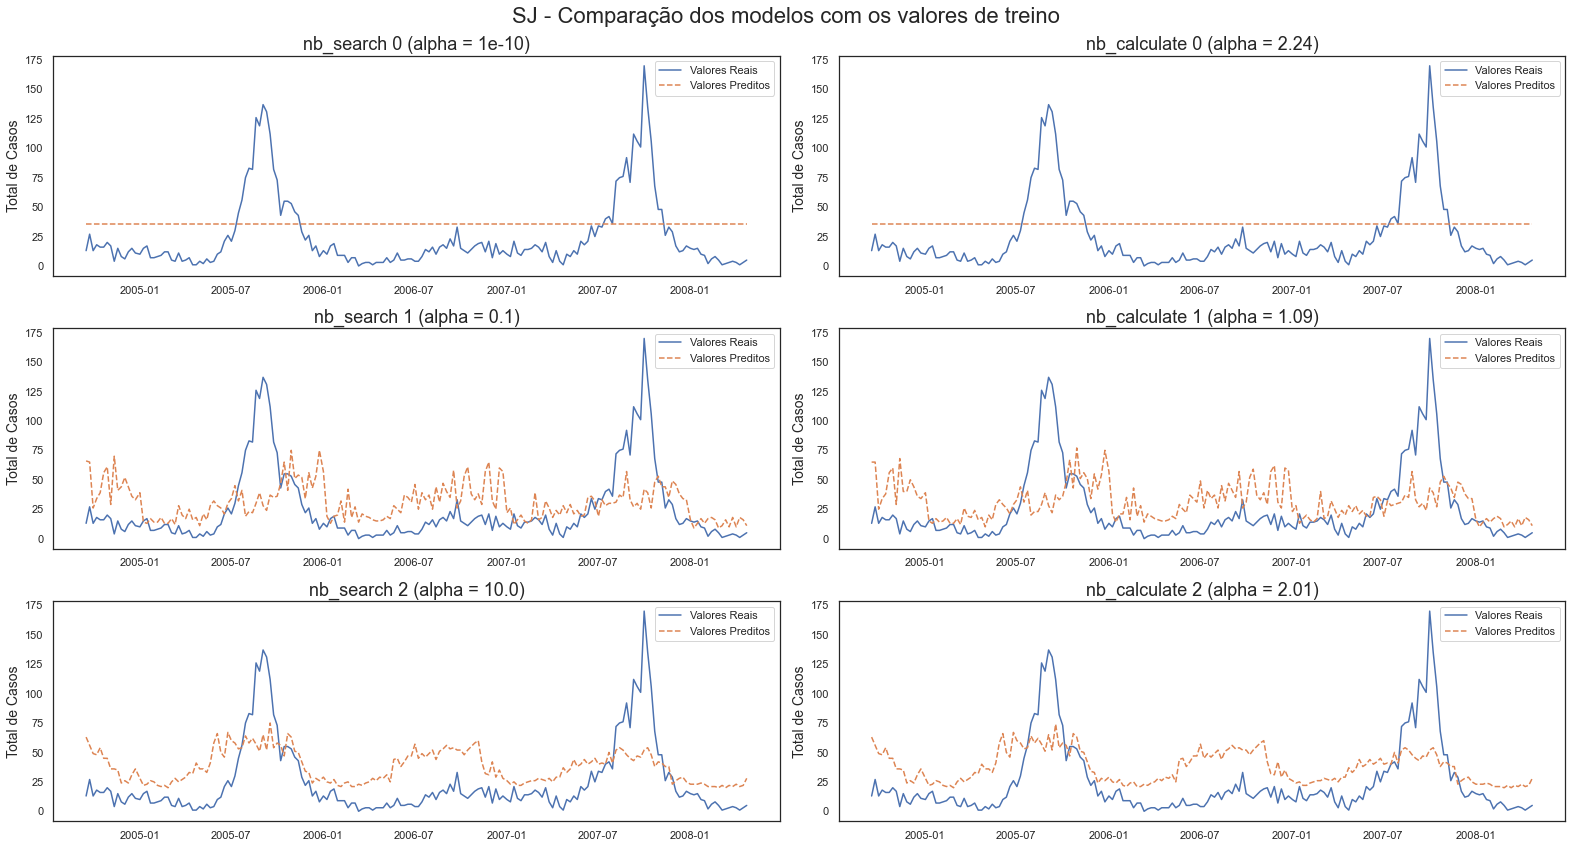

In [74]:
fig, axs = plt.subplots(3, 2, figsize=(22, 12))

for i in range(0, 3):
    sns.lineplot(data=sj_test,  x='week_start_date', y='total_cases', label='Valores Reais', ax=axs[i][0])
    sns.lineplot(data=sj_test,  x='week_start_date', y=PARAMS.loc['sj pred_values', f'nb_search {i}'], linestyle='--', label='Valores Preditos', ax=axs[i][0])
    alpha = PARAMS.loc['sj alpha', f'nb_search {i}']
    axs[i][0].set_title(f'nb_search {i} (alpha = {alpha})')
    axs[i][0].set_xlabel('')
    axs[i][0].set_ylabel('Total de Casos')
    
    sns.lineplot(data=sj_test,  x='week_start_date', y='total_cases', label='Valores Reais', ax=axs[i][1])
    sns.lineplot(data=sj_test,  x='week_start_date', y=PARAMS.loc['sj pred_values', f'nb_calculate {i}'], linestyle='--', label='Valores Preditos', ax=axs[i][1])
    alpha = PARAMS.loc['sj alpha', f'nb_calculate {i}']
    axs[i][1].set_title(f'nb_calculate {i} (alpha = {alpha:.2f})')
    axs[i][1].set_xlabel('')
    axs[i][1].set_ylabel('Total de Casos')

plt.suptitle("SJ - Comparação dos modelos com os valores de treino", fontsize = 22)

plt.legend()
plt.tight_layout()
plt.show()

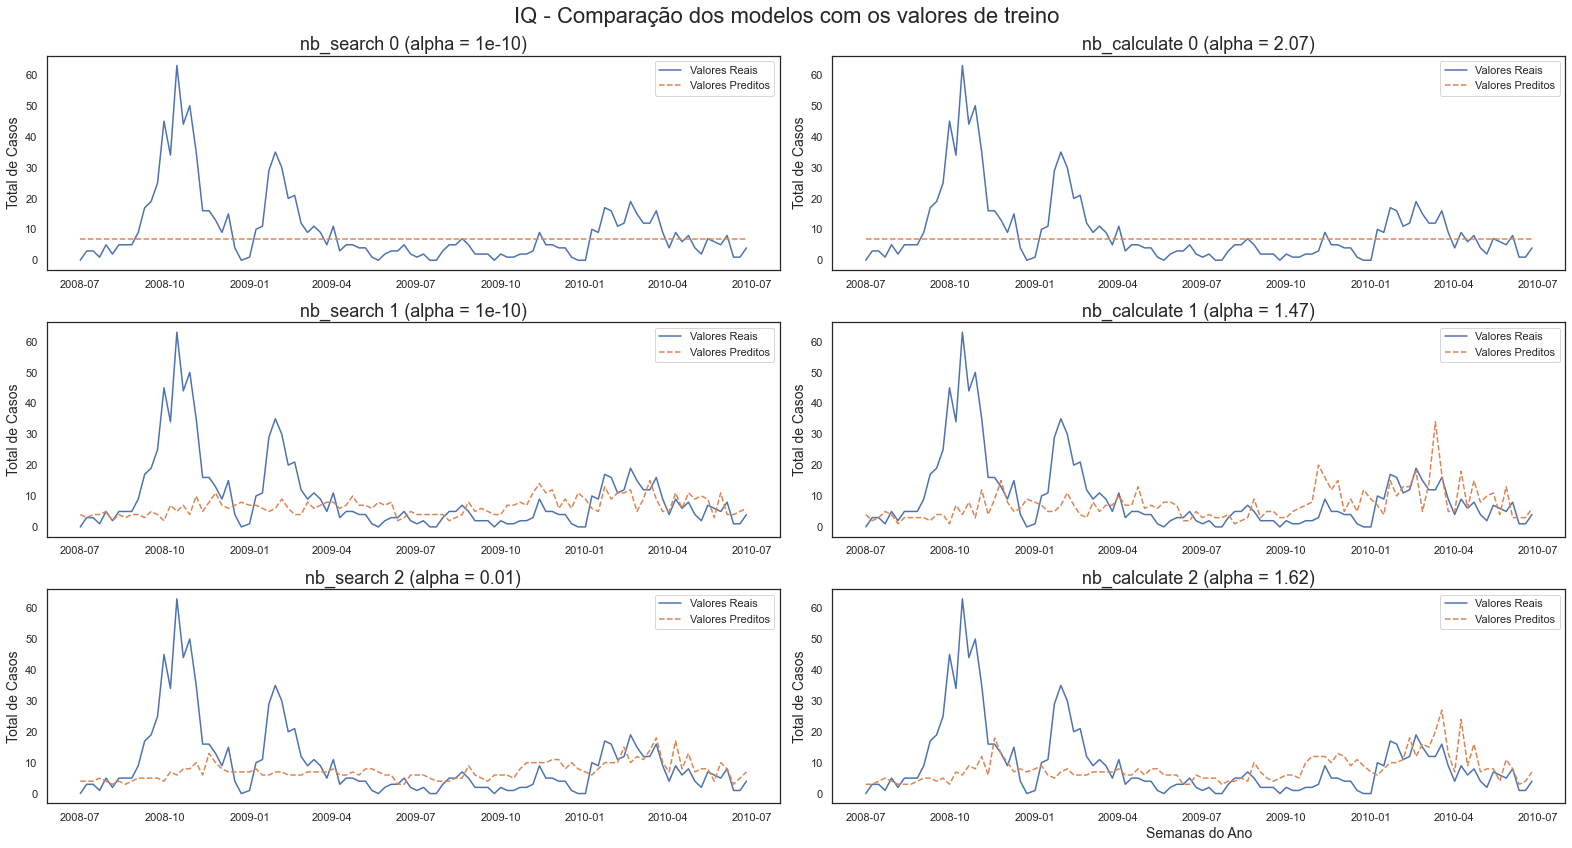

In [75]:
fig, axs = plt.subplots(3, 2, figsize=(22, 12))

for i in range(0, 3):
    sns.lineplot(data=iq_test,  x='week_start_date', y='total_cases', label='Valores Reais', ax=axs[i][0])
    sns.lineplot(data=iq_test,  x='week_start_date', y=PARAMS.loc['iq pred_values', f'nb_search {i}'], linestyle='--', label='Valores Preditos', ax=axs[i][0])
    alpha = PARAMS.loc['iq alpha', f'nb_search {i}']
    axs[i][0].set_title(f'nb_search {i} (alpha = {alpha})')
    axs[i][0].set_xlabel('')
    axs[i][0].set_ylabel('Total de Casos')
    
    sns.lineplot(data=iq_test,  x='week_start_date', y='total_cases', label='Valores Reais', ax=axs[i][1])
    sns.lineplot(data=iq_test,  x='week_start_date', y=PARAMS.loc['iq pred_values', f'nb_calculate {i}'], linestyle='--', label='Valores Preditos', ax=axs[i][1])
    alpha = PARAMS.loc['iq alpha', f'nb_calculate {i}']
    axs[i][1].set_title(f'nb_calculate {i} (alpha = {alpha:.2f})')
    axs[i][1].set_xlabel('')
    axs[i][1].set_ylabel('Total de Casos')

plt.xlabel('Semanas do Ano')
plt.suptitle("IQ - Comparação dos modelos com os valores de treino", fontsize = 22)

plt.legend()
plt.tight_layout()
plt.show()

#### 6.2.4. Tempo de execução

In [76]:
features_to_test = [
    [],
    list(sj_train.columns[1:-1]),
    ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'station_avg_temp_k', 'station_min_temp_k']
]

TIMES = pd.DataFrame(index=['sj', 'iq'])

for i, features in enumerate(features_to_test):
    # Modelo 6.2.1
    sj_time = %timeit -o nb_search_training(sj_train, sj_test, features)
    iq_time = %timeit -o nb_search_training(iq_train, iq_test, features)
    
    TIMES[f'nb_search {i}'] = [sj_time.average, iq_time.average]
    
    # Modelo 6.2.2
    sj_time = %timeit -o nb_calculate_training(sj_train, features)
    iq_time = %timeit -o nb_calculate_training(iq_train, features)
    
    TIMES[f'nb_calculate {i}'] = [sj_time.average, iq_time.average]

TIMES.round(2).T

245 ms ± 28.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
221 ms ± 26.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
43.8 ms ± 2.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
35.5 ms ± 4.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.03 s ± 303 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
880 ms ± 80.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
265 ms ± 58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
206 ms ± 23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
567 ms ± 77.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
449 ms ± 15.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
59.9 ms ± 13.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
44.5 ms ± 4.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


sj    iq
nb_search 0     0.25  0.22
nb_calculate 0  0.04  0.04
nb_search 1     2.03  0.88
nb_calculate 1  0.26  0.21
nb_search 2     0.57  0.45
nb_calculate 2  0.06  0.04

### 6.3. Submissão para competição

In [77]:
submission_features_path = f'{DATAPATH}/dengue_features_test.csv?raw=true'
submission_format_path = f'{DATAPATH}/submission_format.csv?raw=true'

sj_train, iq_train = df_preprocess(features_path, labels_path=labels_path)
sj_test, iq_test = df_preprocess(submission_features_path)
submission_format = pd.read_csv(submission_format_path, index_col=[0, 1, 2])

In [78]:
features_to_submit = [
    list(sj.columns[1:-1]),
    ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'station_avg_temp_k', 'station_min_temp_k']
]

sj_train_subtrain_size = int(len(sj_train) * 0.8)
sj_train_subtrain = sj_train.head(sj_train_subtrain_size)
sj_train_subtest  = sj_train.tail(len(sj_train) - sj_train_subtrain_size)

iq_train_subtrain_size = int(len(iq_train) * 0.8)
iq_train_subtrain = iq_train.head(iq_train_subtrain_size)
iq_train_subtest  = iq_train.tail(len(iq_train) - iq_train_subtrain_size)

# Modelo Baseline
sj_baseline = baseline_training(sj_train)
iq_baseline = baseline_training(iq_train)
sj_baseline_pred = sj_baseline.predict(start=len(sj_train), end=(len(sj_train) + len(sj_test) - 1)).astype(int)
iq_baseline_pred = iq_baseline.predict(start=len(iq_train), end=(len(iq_train) + len(iq_test) - 1)).astype(int)

submission = submission_format.copy()
submission.total_cases = np.concatenate([sj_baseline_pred, iq_baseline_pred])
submission.to_csv(f'../data/baseline.csv')
    
for i, features in enumerate(features_to_submit):
    # Modelo 6.2.1
    sj_model, sj_alpha = nb_search_training(sj_train_subtrain, sj_train_subtest, features)
    iq_model, iq_alpha = nb_search_training(iq_train_subtrain, iq_train_subtest, features)
    sj_pred = sj_model.predict(sj_test).astype(int)
    iq_pred = iq_model.predict(iq_test).astype(int)
    
    submission = submission_format.copy()
    submission.total_cases = np.concatenate([sj_pred, iq_pred])
    submission.to_csv(f'../data/nb_search_{i+1}.csv')
    
    # Modelo 6.2.2
    sj_model, sj_alpha = nb_calculate_training(sj_train, features)
    iq_model, iq_alpha = nb_calculate_training(iq_train, features)
    sj_pred = sj_model.predict(sj_test).astype(int)
    iq_pred = iq_model.predict(iq_test).astype(int)

    submission = submission_format.copy()
    submission.total_cases = np.concatenate([sj_pred, iq_pred])
    submission.to_csv(f'../data/nb_calculate_{i+1}.csv')

## 7. Conclusão